In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import Image
from weasyprint import HTML as WeasyHTML

# Function to display images in the DataFrame
import base64
import os
import json

In [2]:
DATA_PATH = '../../test_suite/'

def load_data(path):

    # get all directories in the path
    directories = [x[0] for x in os.walk(path)]

    results = []

    for directory in directories:
        file_path = os.path.join(directory, 'structure.json')
        if not os.path.exists(file_path):
            continue

        # read the json file
        data = json.load(open(file_path))
        methods = [*data['methods'].keys()]

        for test_id, test_data in data['tests'].items():
            result = dict(
                    structure=data['structure']['name'],
                    density=test_data['density'],
                    mu=test_data['mu'],
                    structure_kwargs=str(data['structure']['kwargs']),
                    plot_env=data['structure']['plots_env'][str(test_data['step'])],
                    plot_cra=data['structure']['plots_cra'][str(test_data['step'])],
                    step=test_data['mu'],
                    is_stable=test_data['is_stable'],
            )
            for method in methods:
                method_name = data['methods'][method]['name']
                result[method_name] = test_data[method]['is_stable']

            for method in methods:
                method_name = data['methods'][method]['name']
                result[method_name+ '_time'] = test_data[method]['time']


            results.append(result)
    return pd.DataFrame(results)
df = load_data(DATA_PATH)
df


,structure,density,mu,structure_kwargs,plot_env,plot_cra,step,is_stable,pybullet,rbe,pybullet_time,rbe_time
0,horizontal_bridge,1.0,0.8,{'freeze_last': False},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,0.8,True,True,True,0.030240,0.023451
1,horizontal_bridge,1.0,0.8,{'freeze_last': False},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,0.8,False,False,False,0.057078,0.038746
2,horizontal_bridge,1.0,0.8,{'freeze_last': False},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,0.8,True,True,True,0.301727,0.032069
3,horizontal_bridge,1.0,2.0,{'freeze_last': False},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,2.0,True,True,True,0.033304,0.023611
4,horizontal_bridge,1.0,2.0,{'freeze_last': False},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,2.0,False,False,False,0.064381,0.038886
...,...,...,...,...,...,...,...,...,...,...,...,...
91,hexagon,1.0,2.0,{},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,2.0,True,True,True,0.128805,0.031887
92,levitating_block,1.0,0.8,{'freeze_last': True},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,0.8,True,True,True,0.011474,0.000004
93,levitating_block,1.0,0.8,{'freeze_last': True},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,0.8,False,False,False,0.022821,0.032096
94,levitating_block,1.0,2.0,{'freeze_last': True},/Users/johannes/SDSC/Projects/Robotoddler/test...,/Users/johannes/SDSC/Projects/Robotoddler/test...,2.0,True,True,True,0.009777,0.000004


,structure,density,mu,structure_kwargs,step,is_stable,pybullet,rbe,pybullet_time,rbe_time,plot_env_img,plot_cra_img
0,horizontal_bridge,1.0,0.8,{'freeze_last': False},0.8,True,True,True,0.030240,0.023451,,
1,horizontal_bridge,1.0,0.8,{'freeze_last': False},0.8,False,False,False,0.057078,0.038746,,
2,horizontal_bridge,1.0,0.8,{'freeze_last': False},0.8,True,True,True,0.301727,0.032069,,
3,horizontal_bridge,1.0,2.0,{'freeze_last': False},2.0,True,True,True,0.033304,0.023611,,
4,horizontal_bridge,1.0,2.0,{'freeze_last': False},2.0,False,False,False,0.064381,0.038886,,
5,horizontal_bridge,1.0,2.0,{'freeze_last': False},2.0,True,True,True,0.206798,0.029612,,
6,trapezoid_bridge,1.0,0.8,{'freeze_last': True},0.8,True,True,True,0.010206,0.020631,,
7,trapezoid_bridge,1.0,0.8,{'freeze_last': True},0.8,True,True,True,0.144650,0.027590,,
8,trapezoid_bridge,1.0,0.8,{'freeze_last': True},0.8,True,True,True,0.270654,0.040158,,
9,trapezoid_bridge,1.0,0.8,{'freeze_last': True},0.8,True,True,True,0.348966,0.035919,,

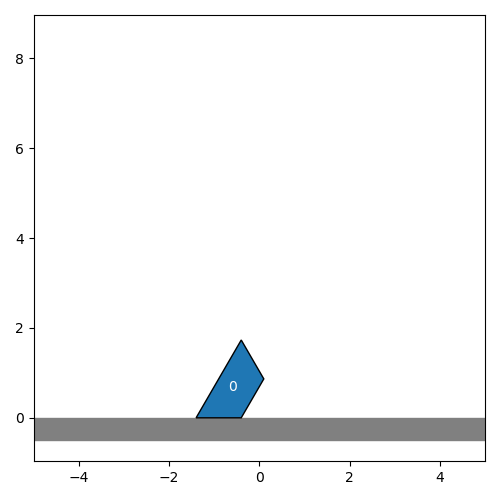
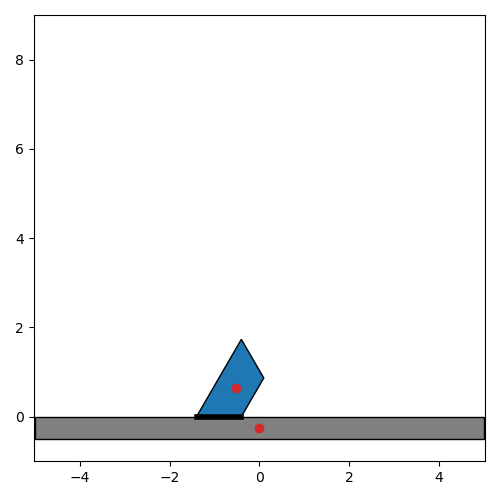
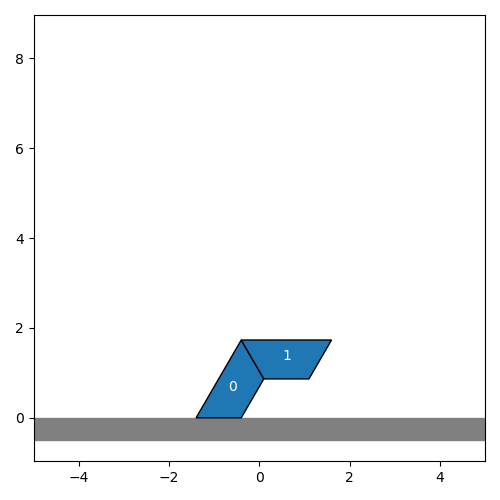
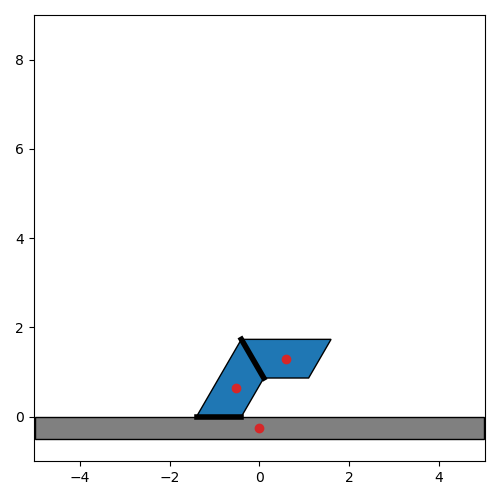
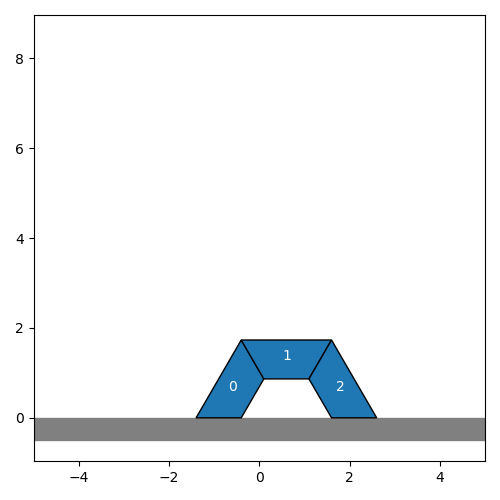
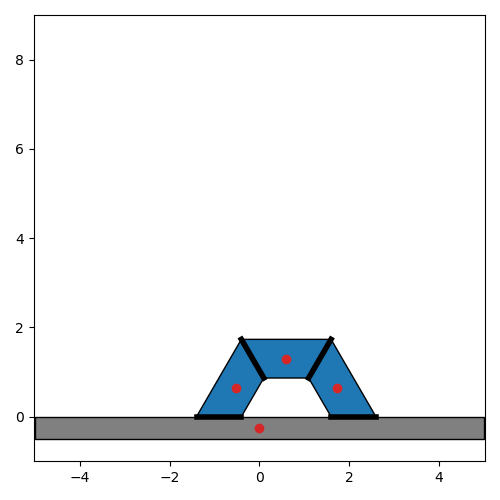
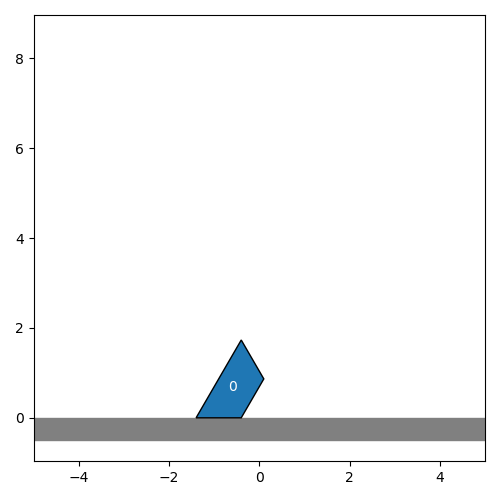
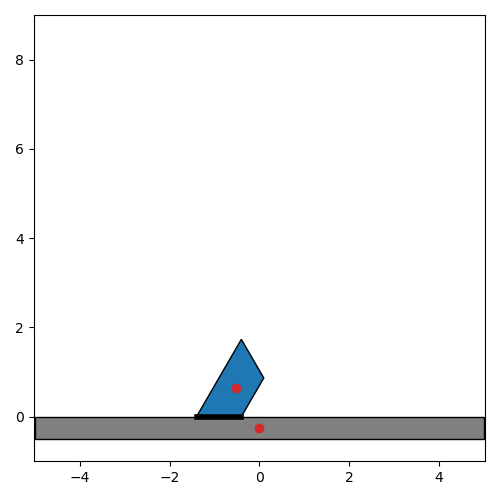
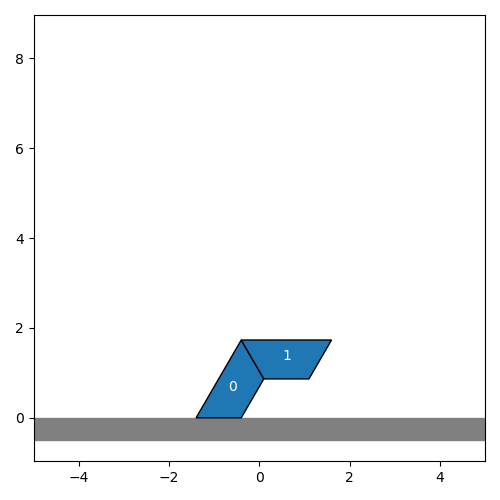
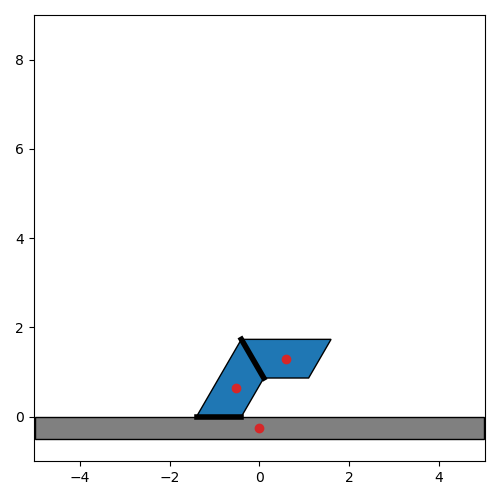
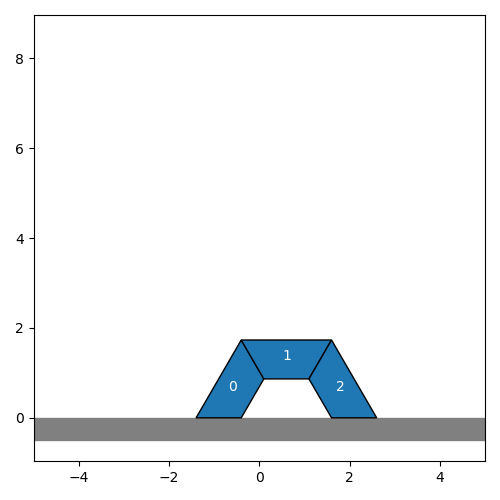
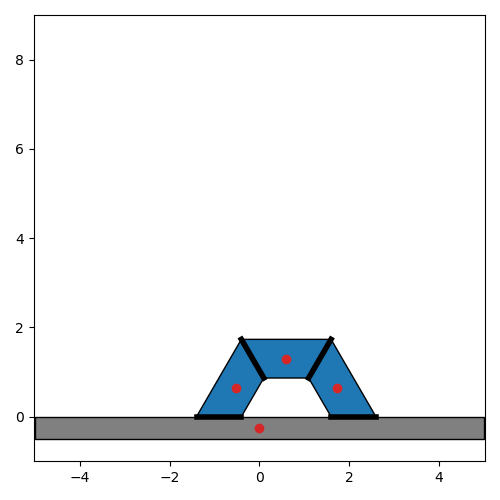
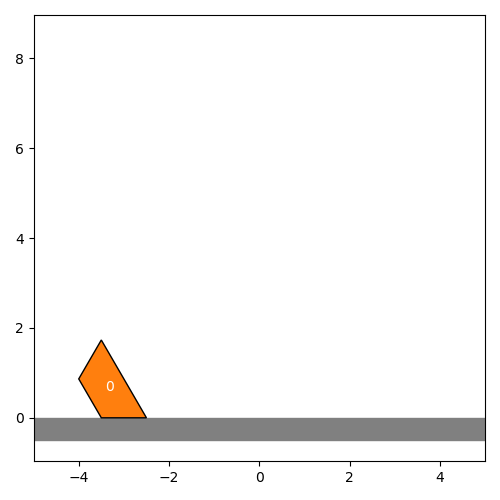
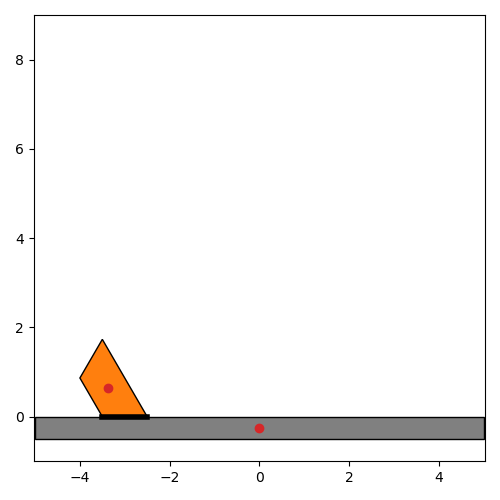
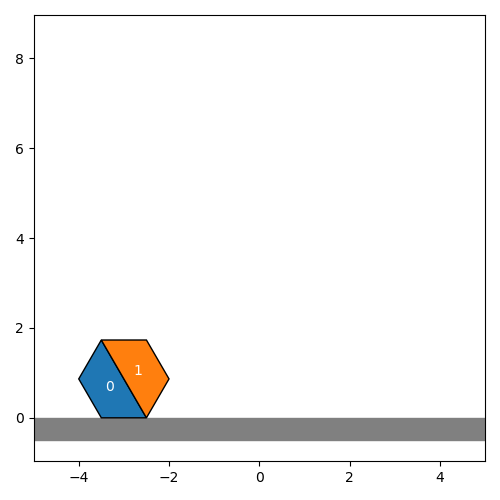
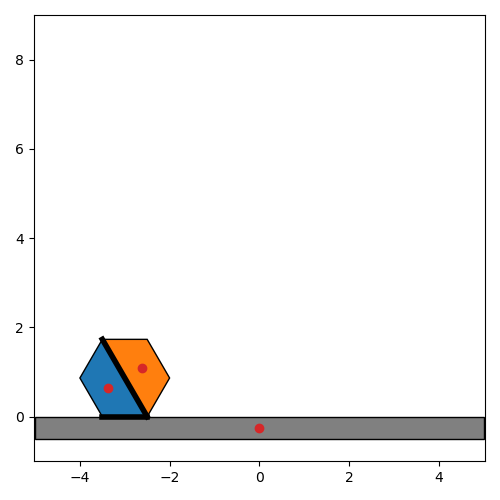
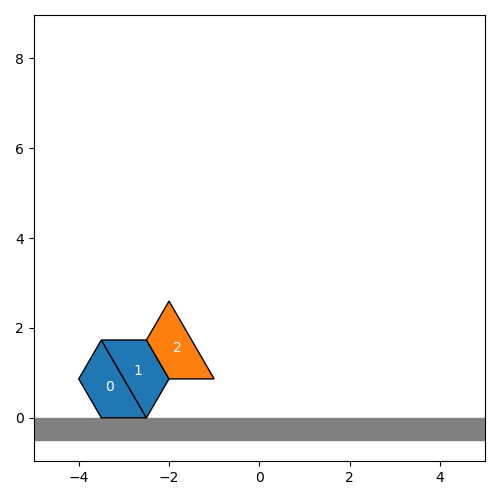
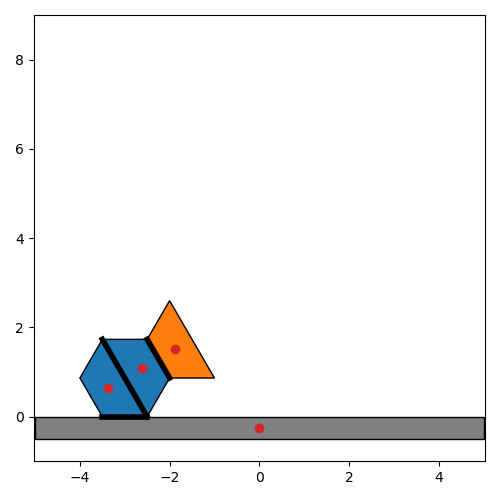
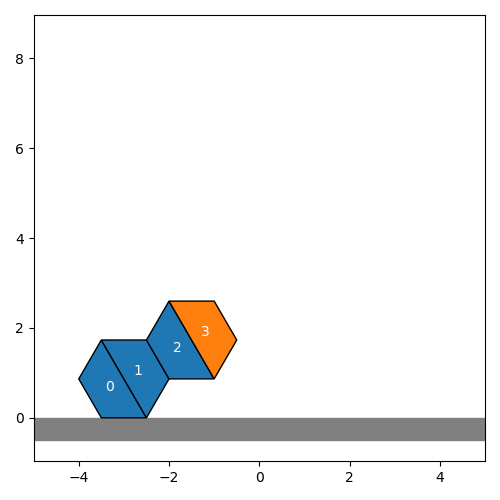
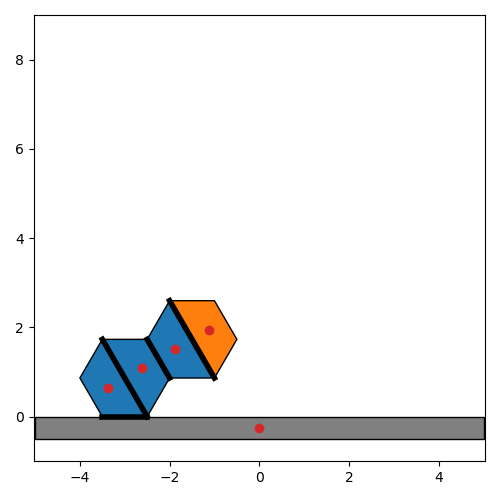
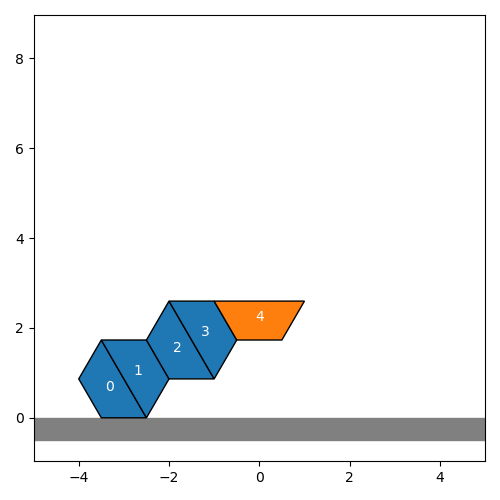
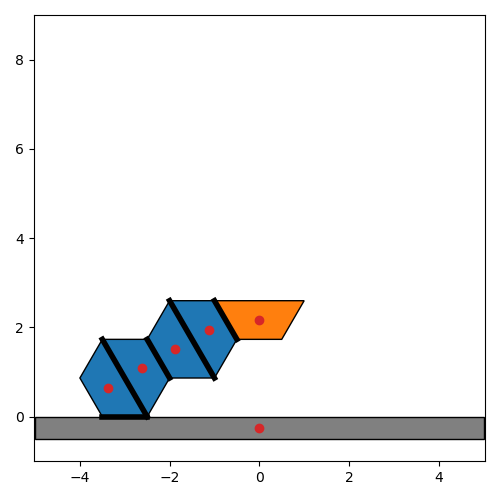
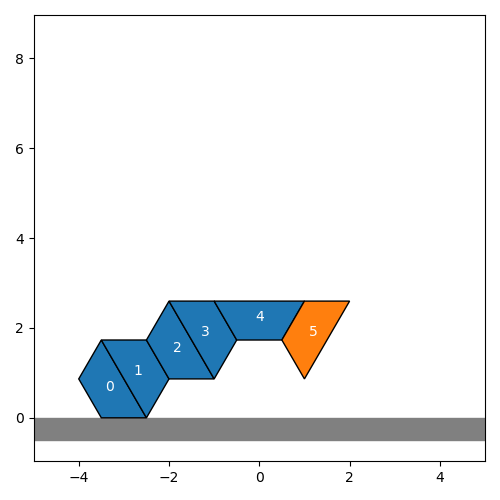
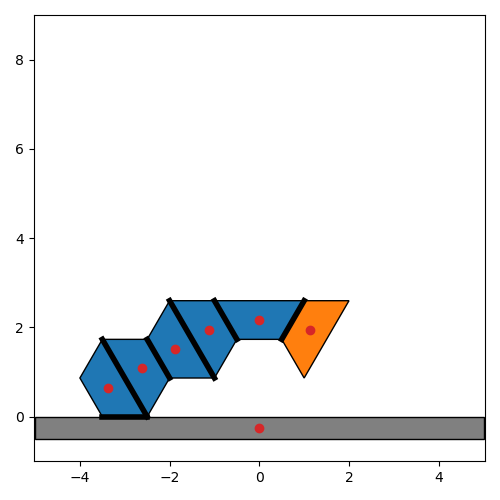
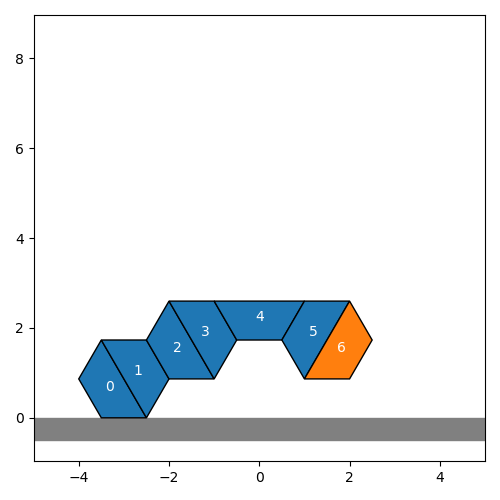
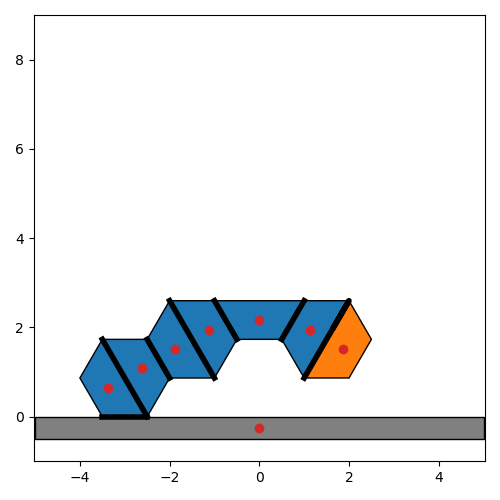
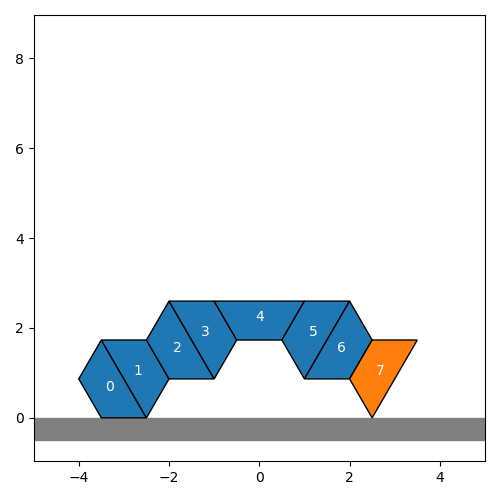
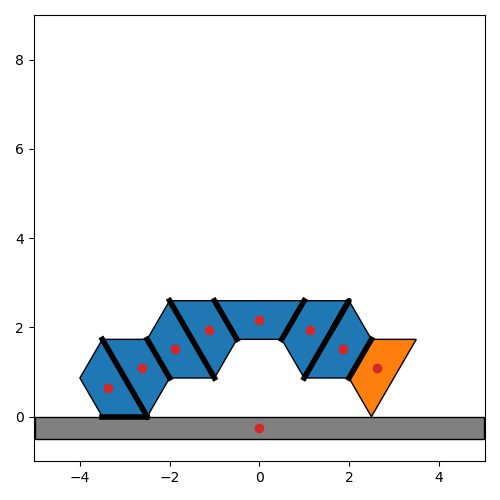
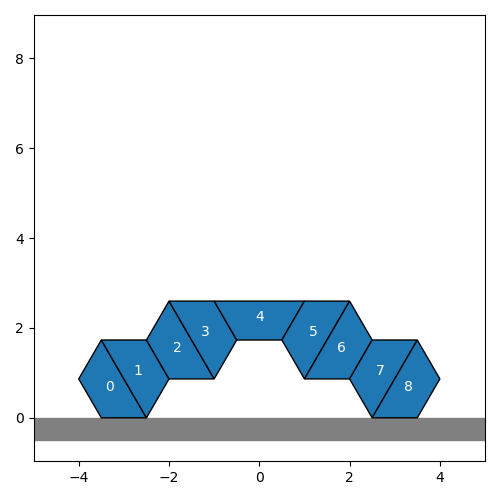
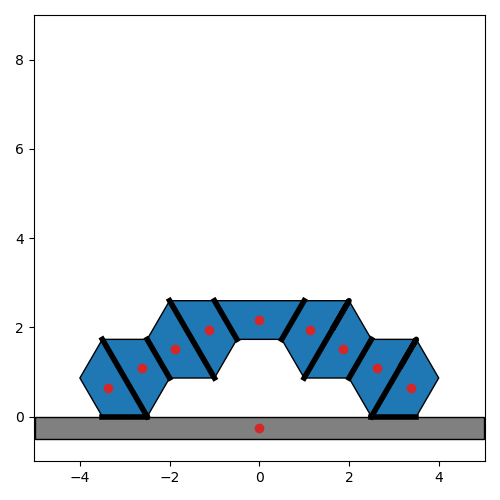
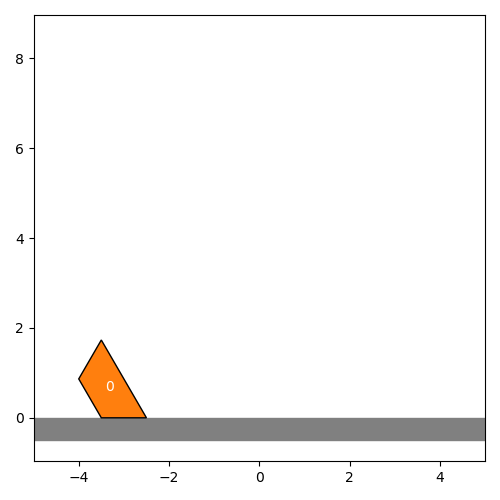
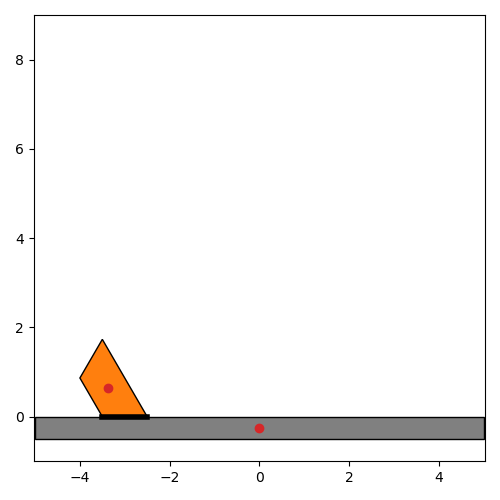
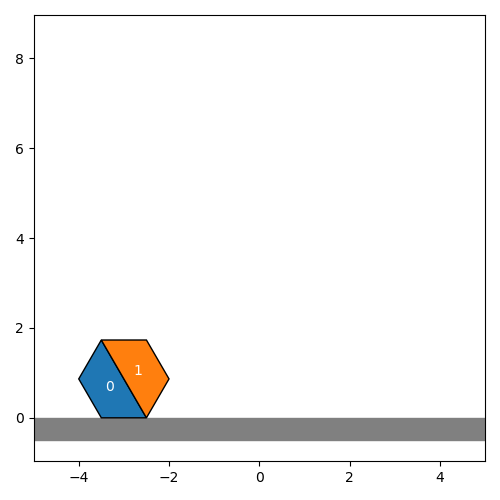
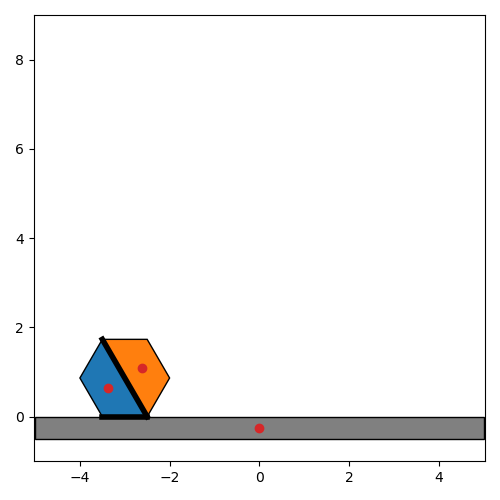
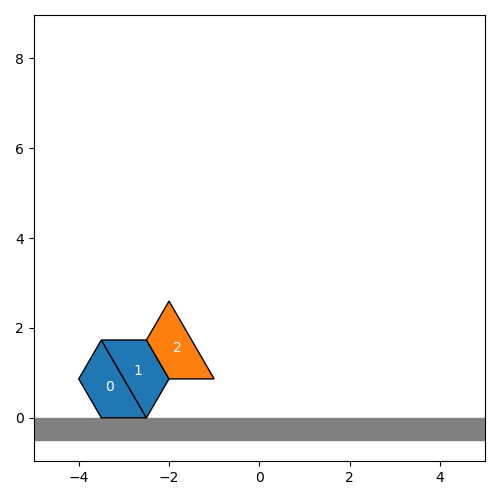
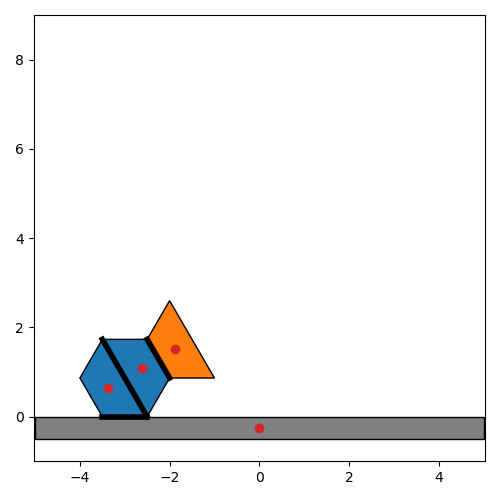
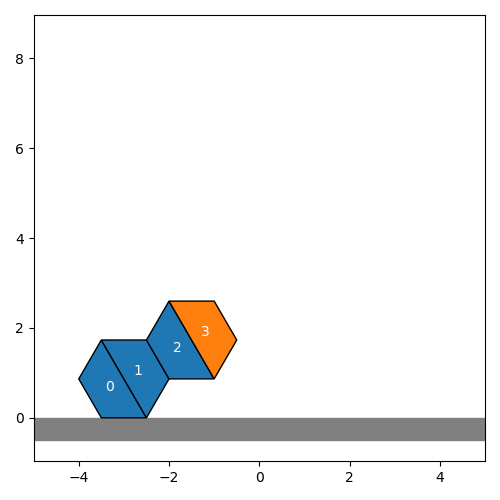
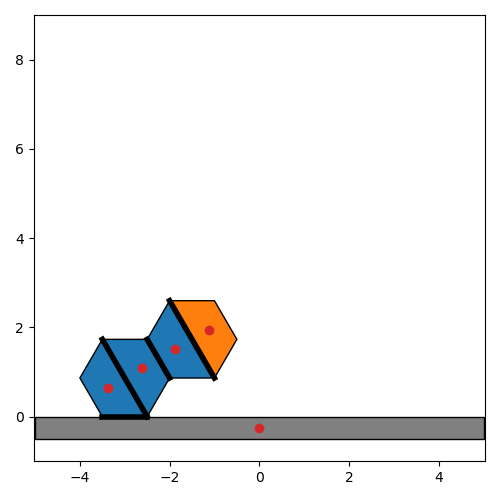
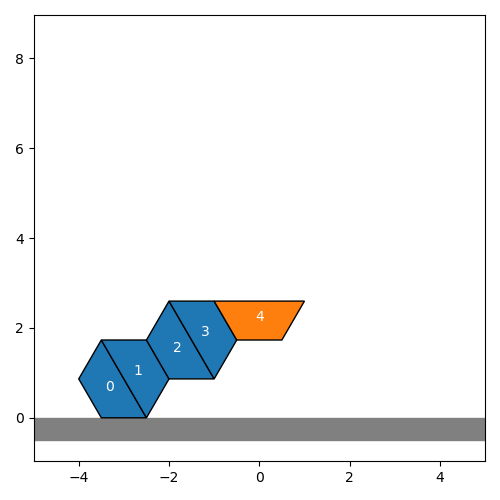
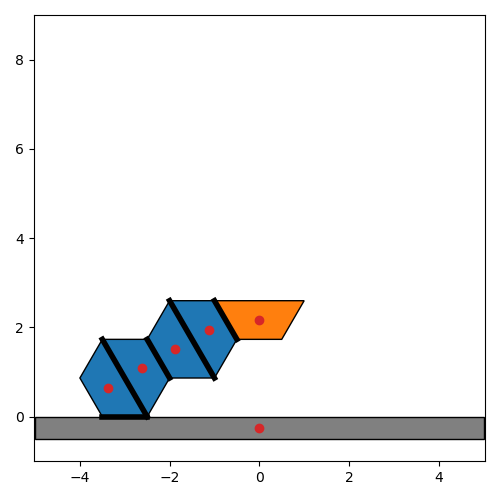
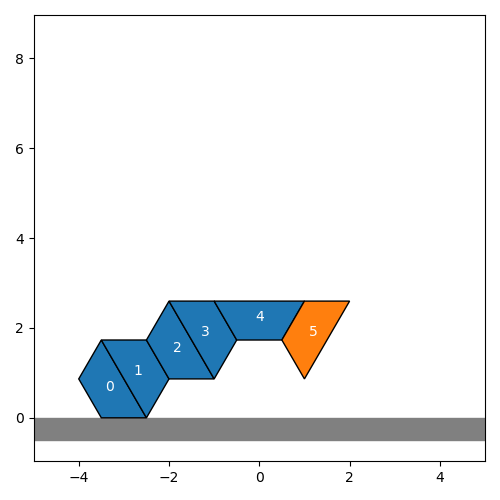
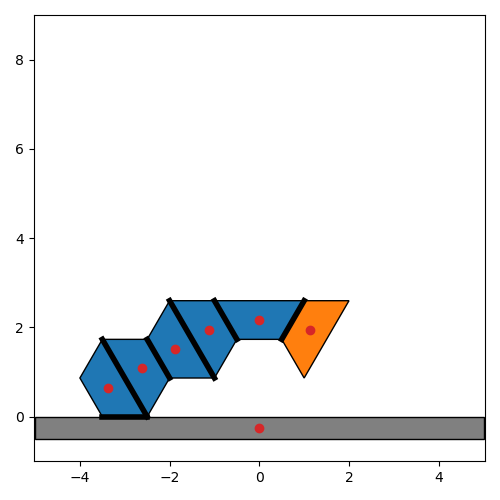
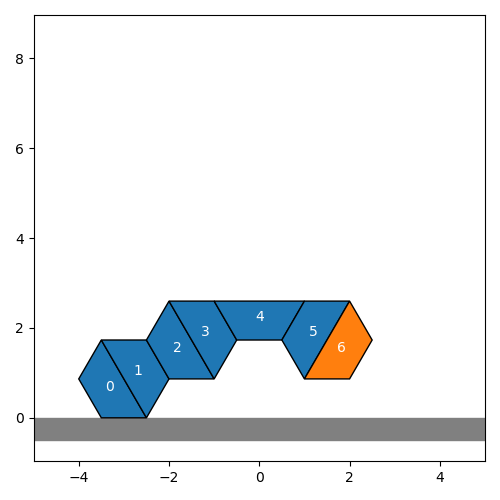
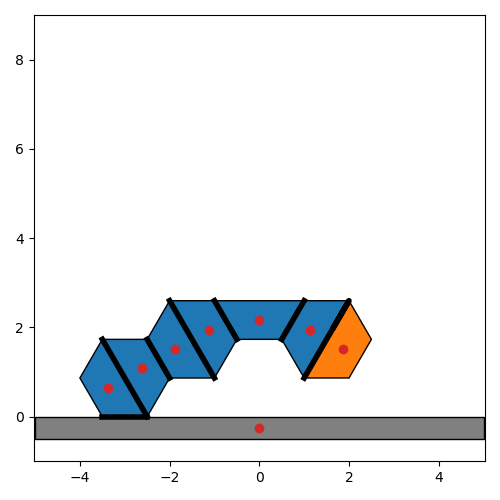
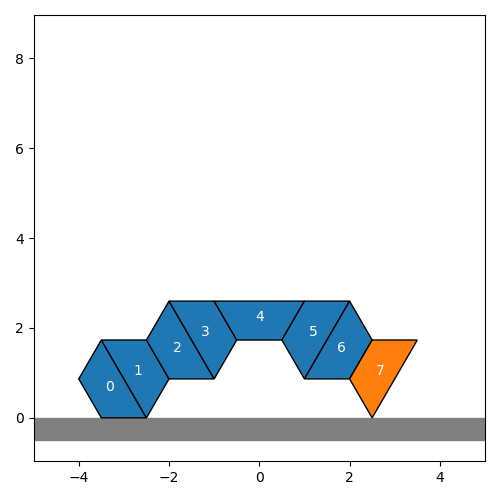
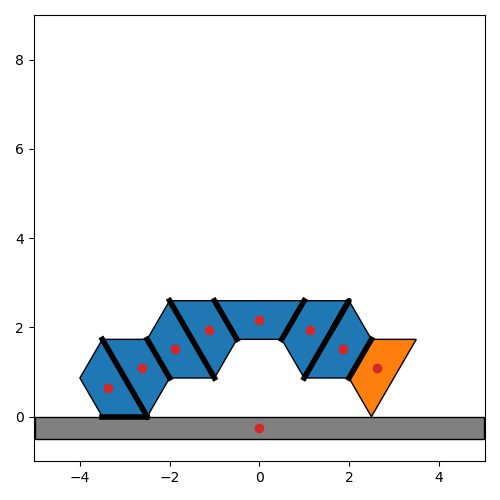
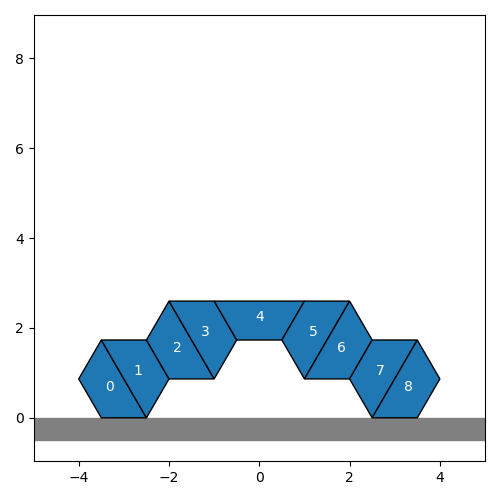
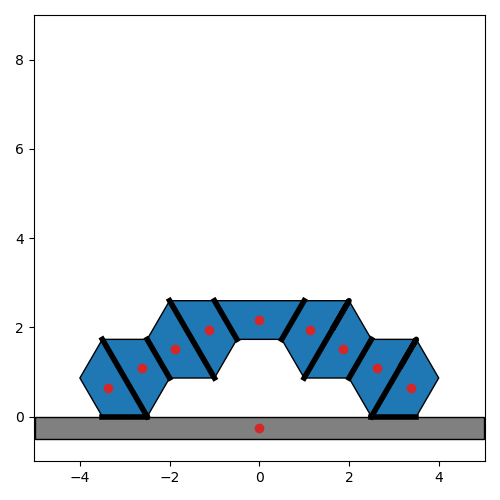
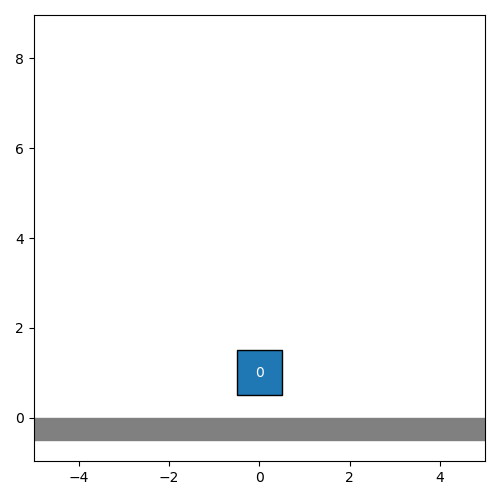
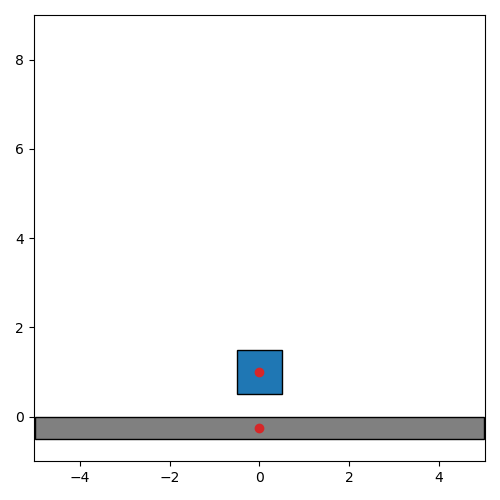
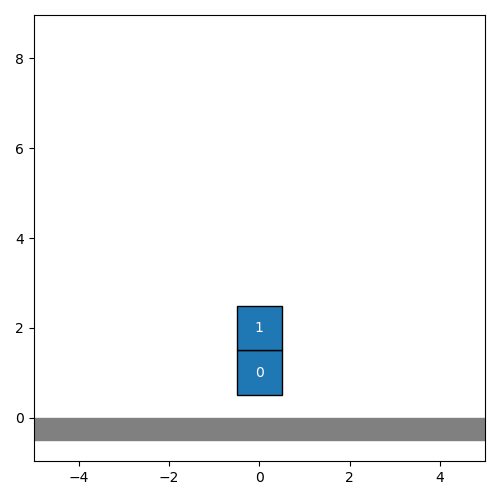
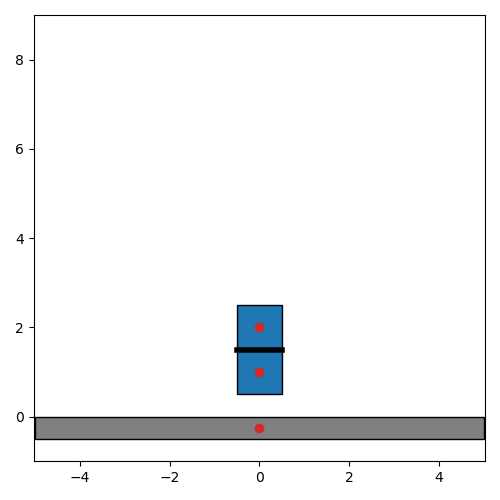
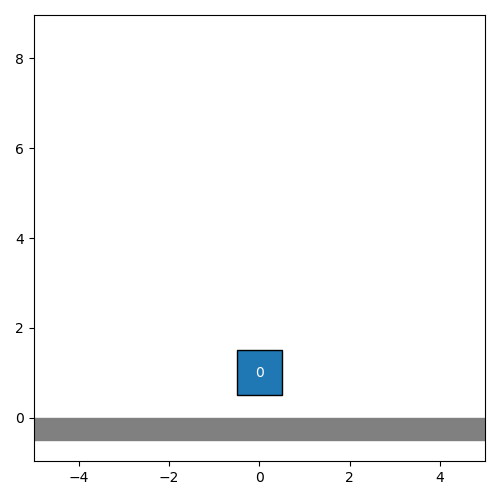
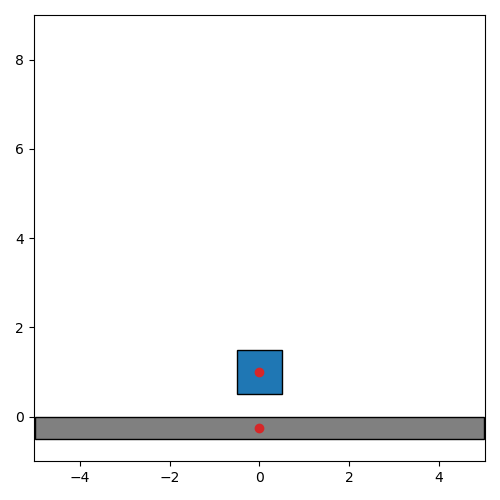
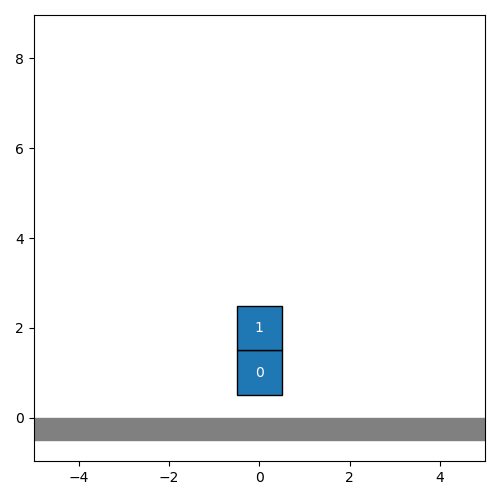
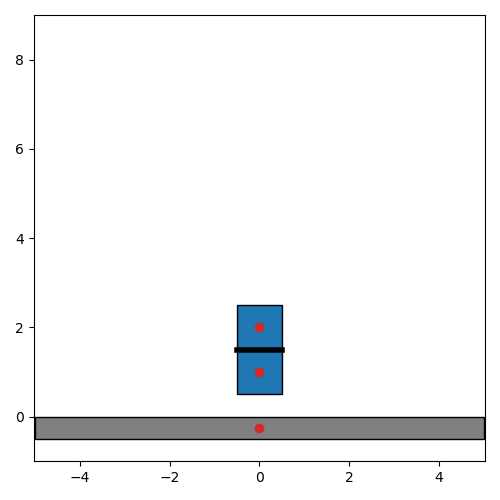
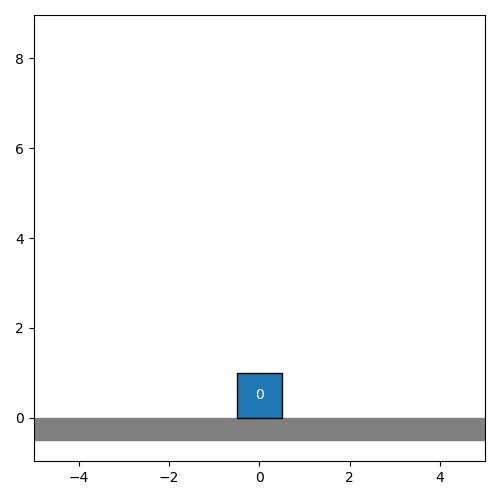
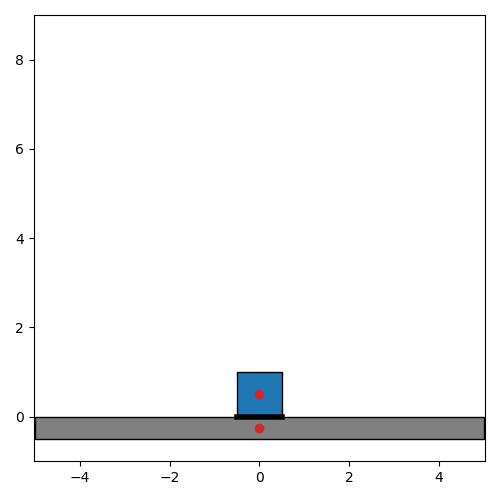
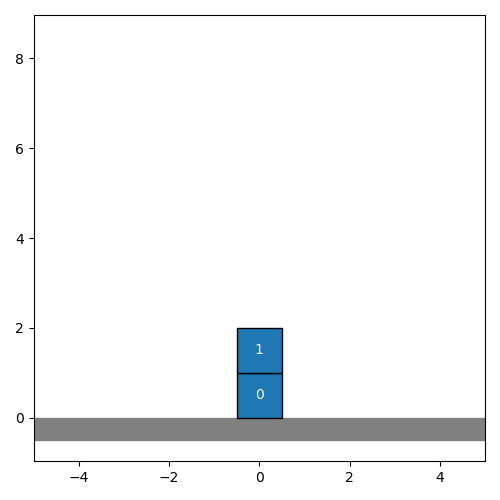
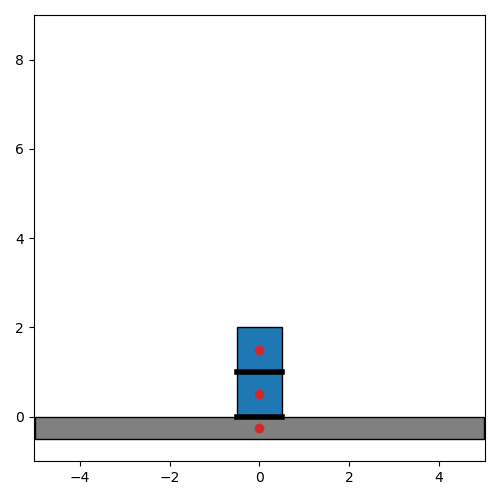
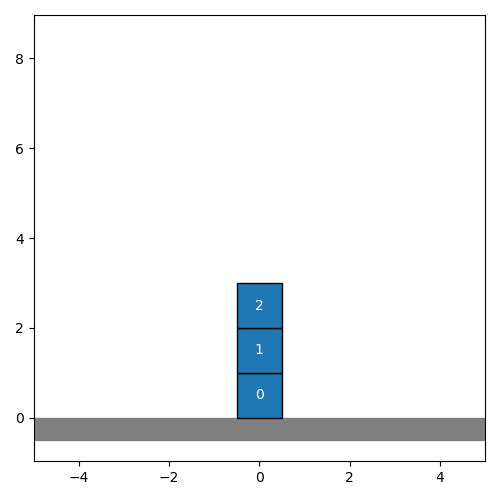
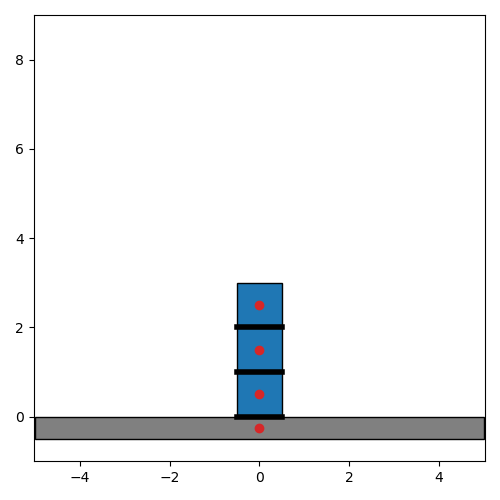
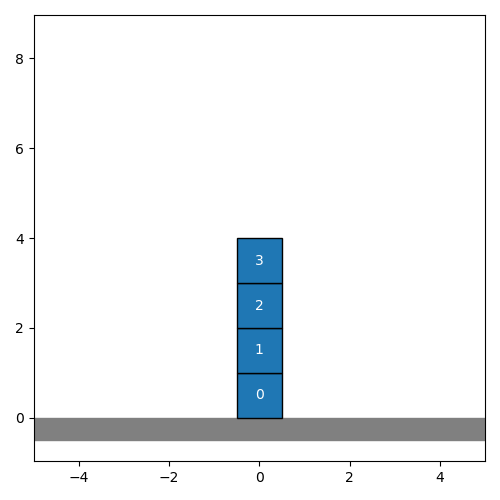
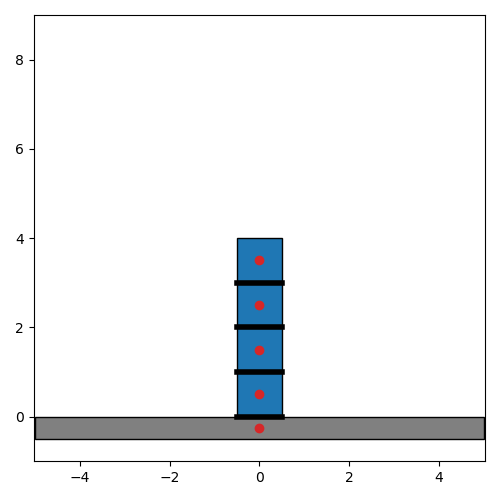
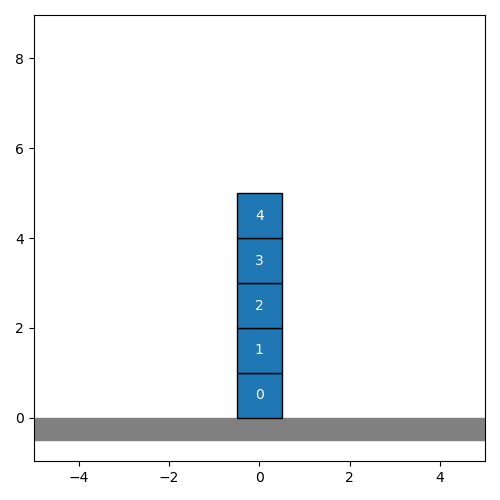
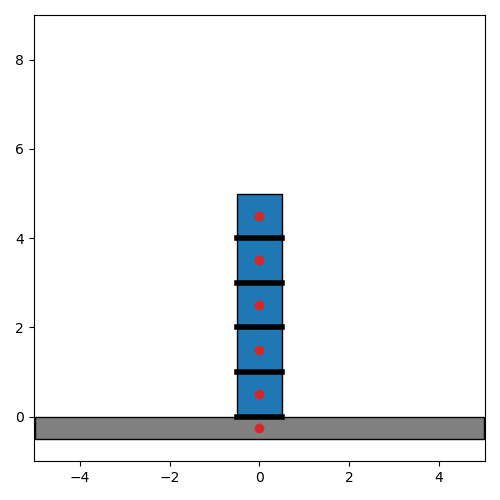
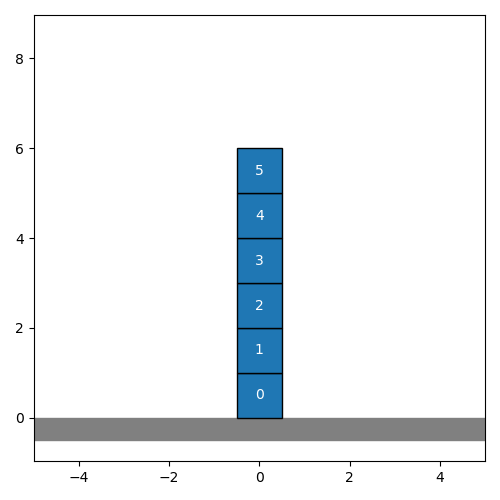
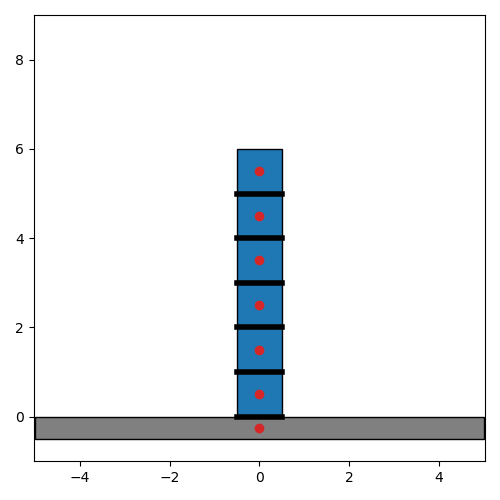
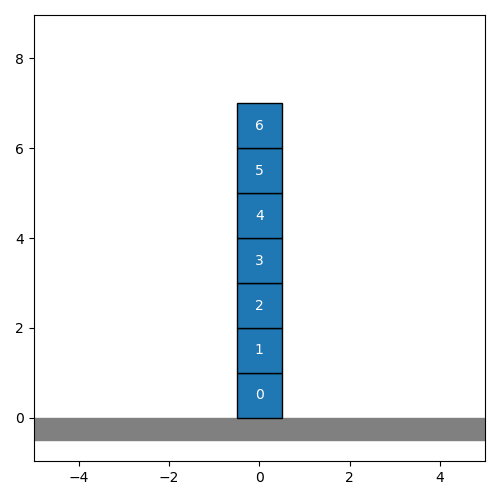
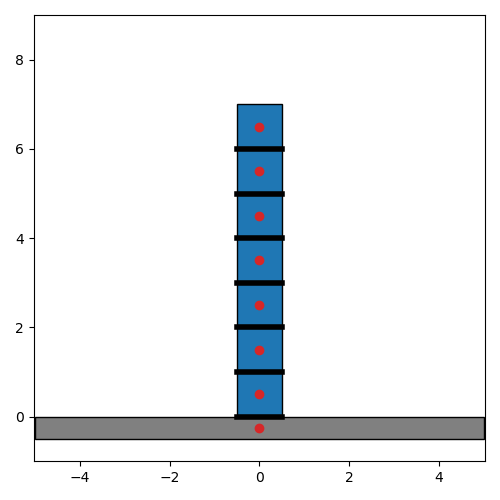
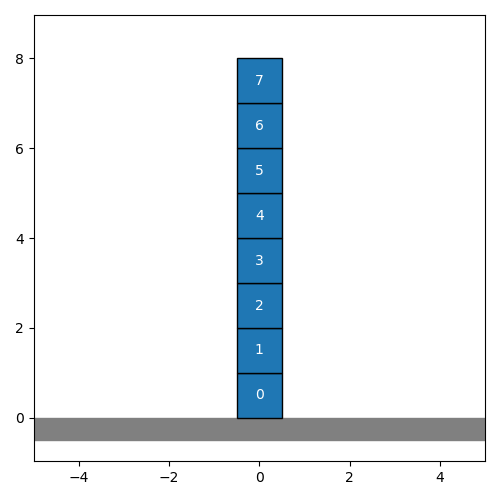
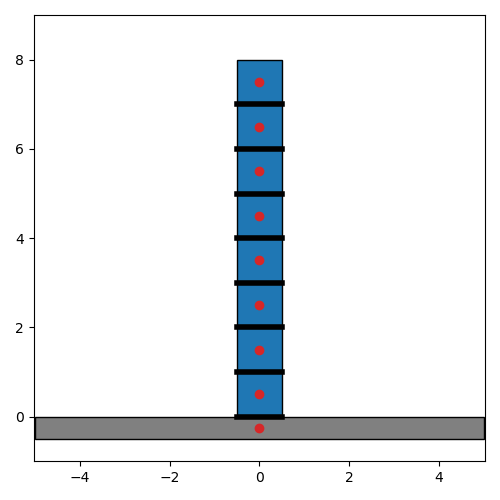
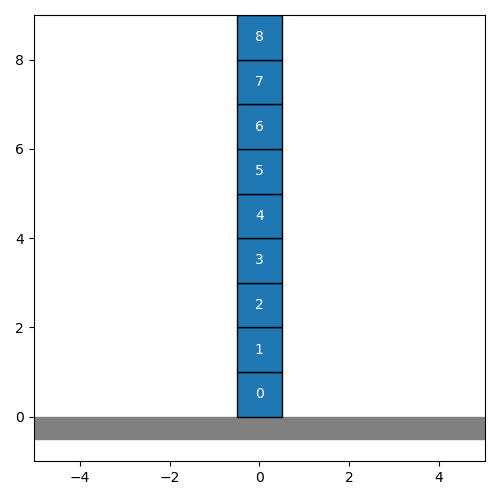
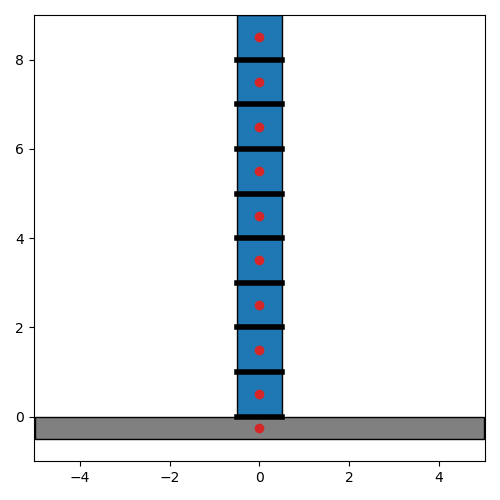
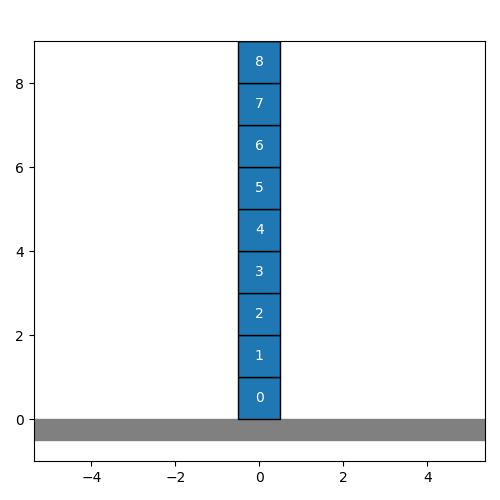
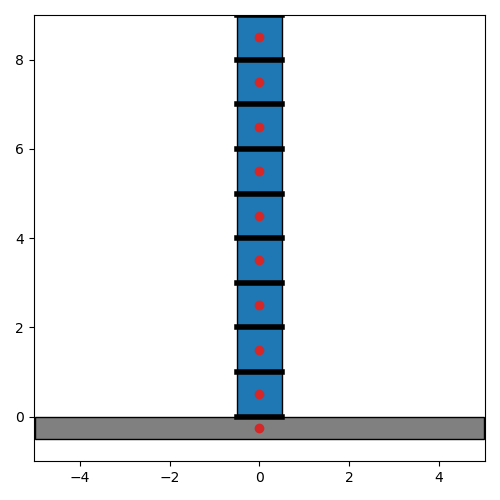
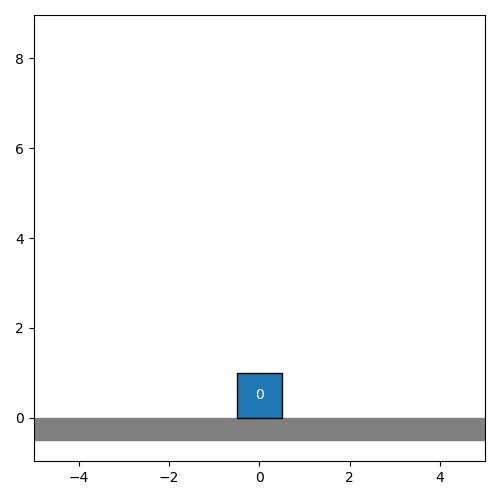
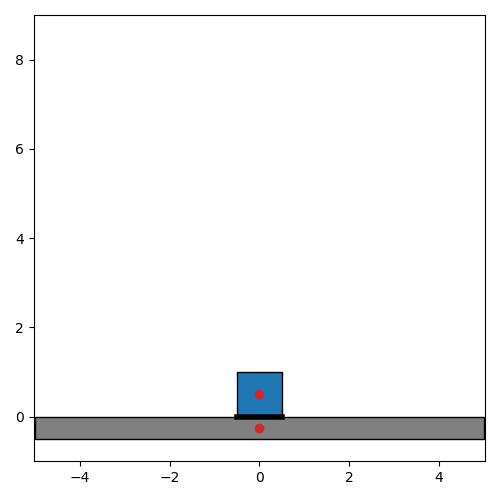
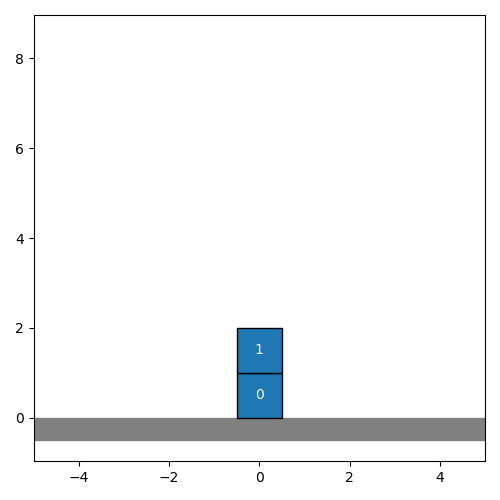
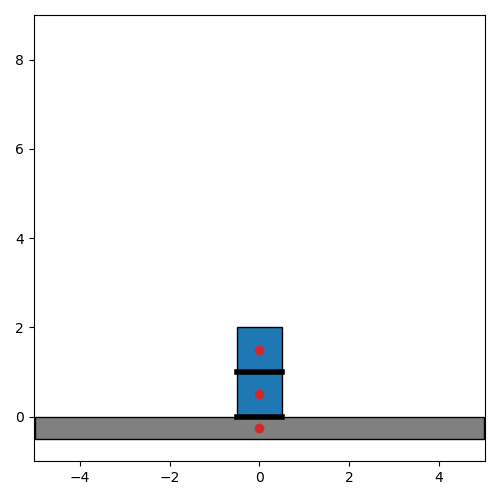
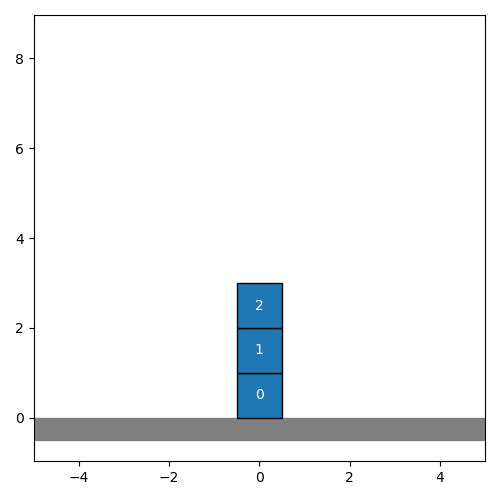
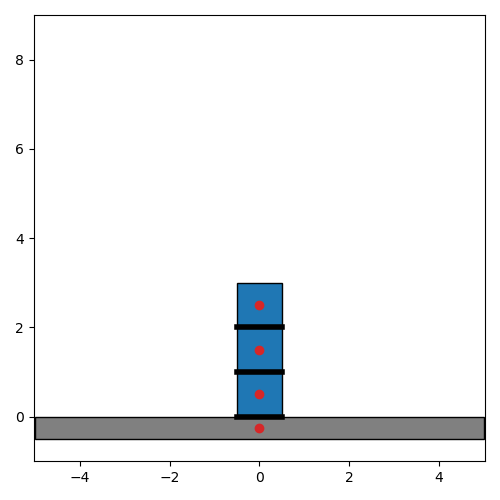
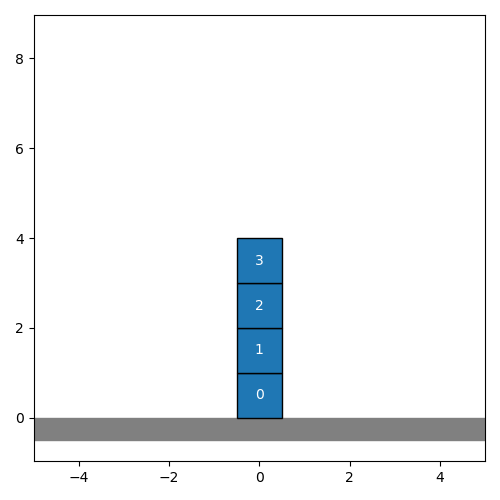
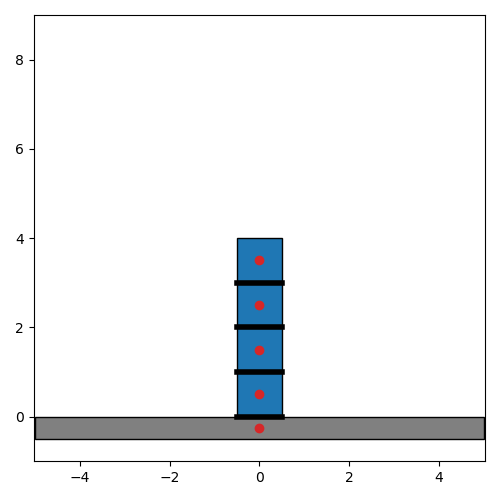
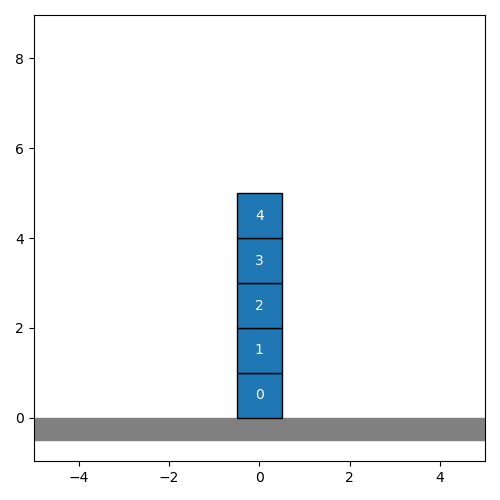
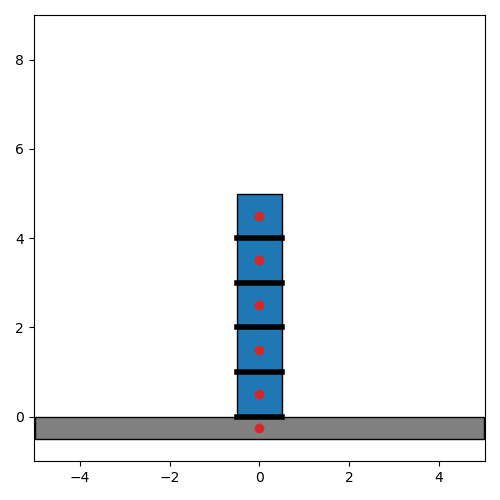
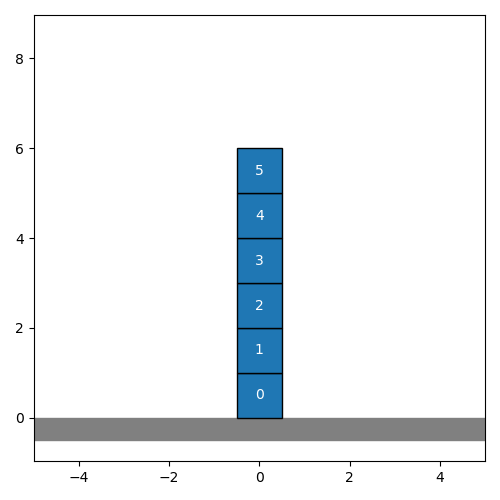
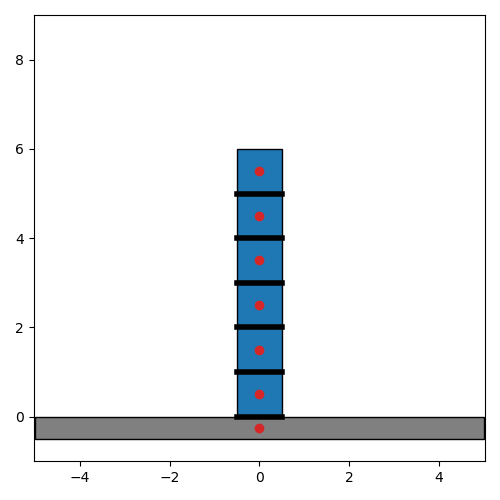
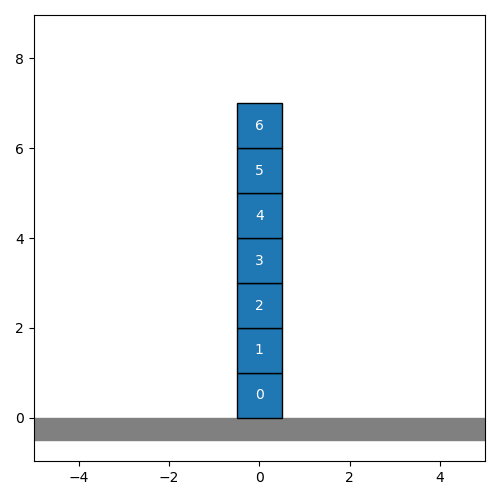
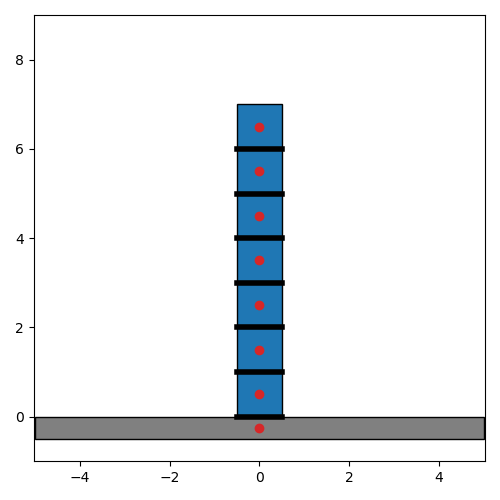
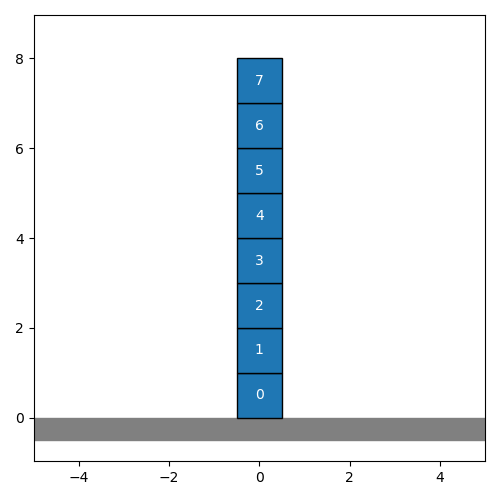
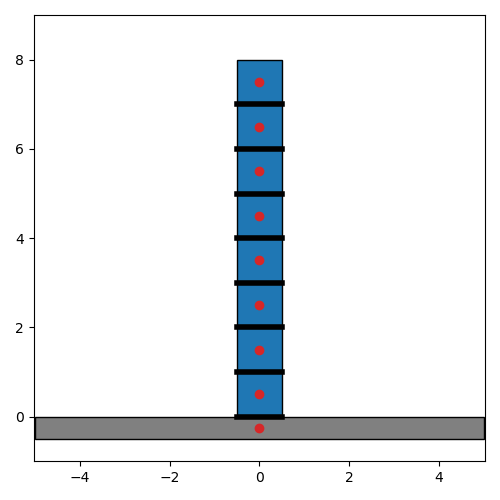
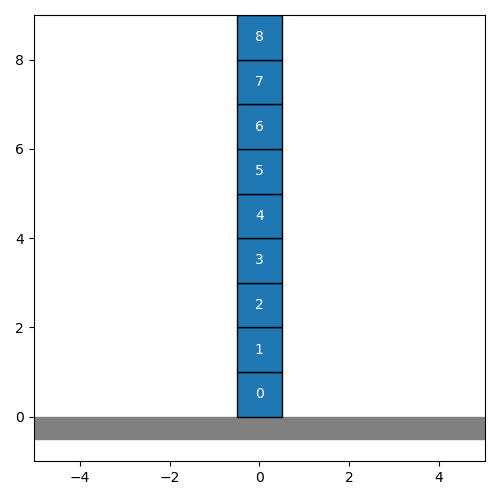
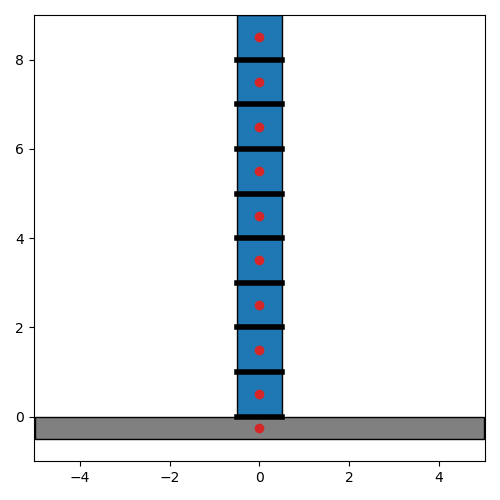
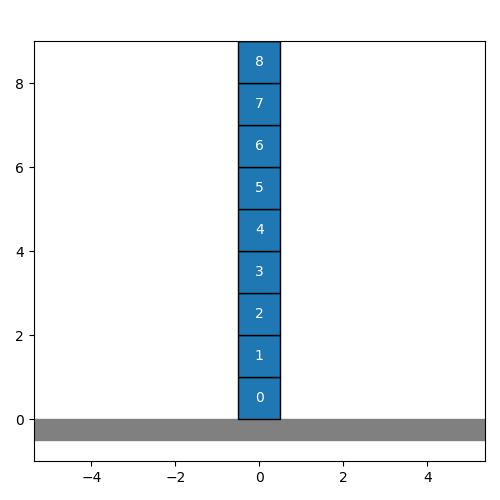
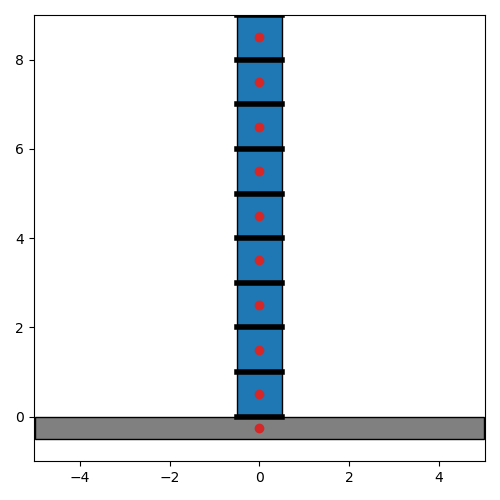
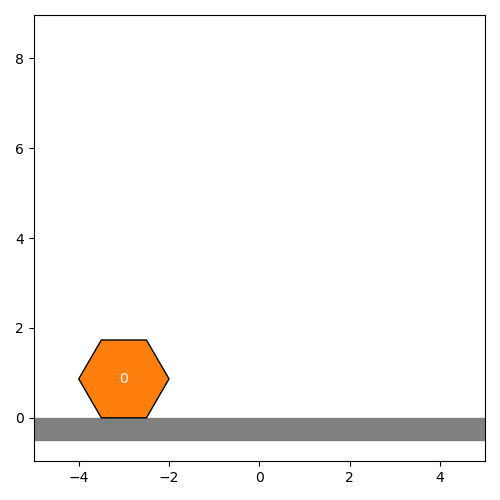
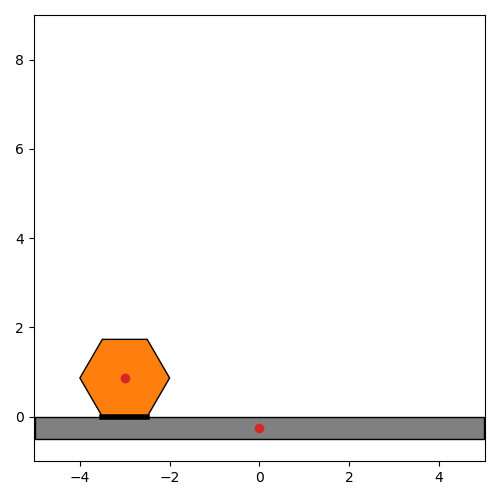
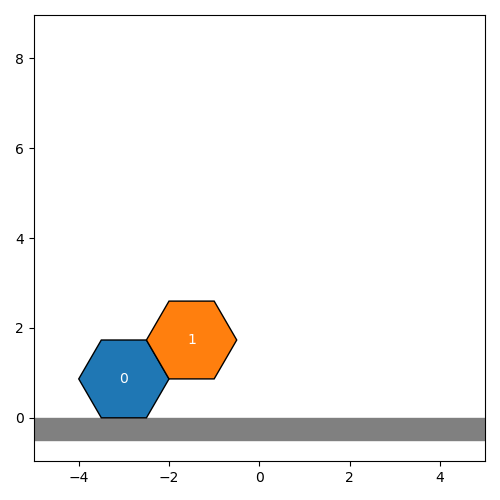
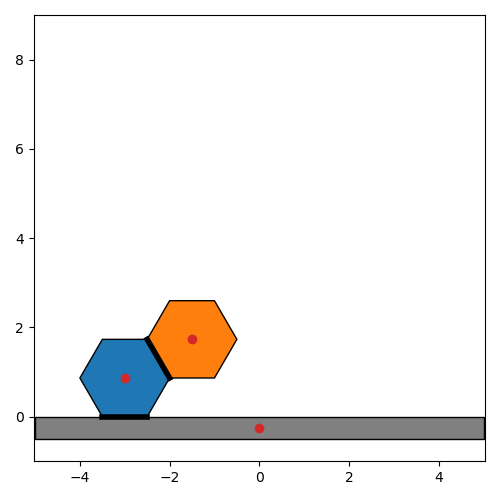
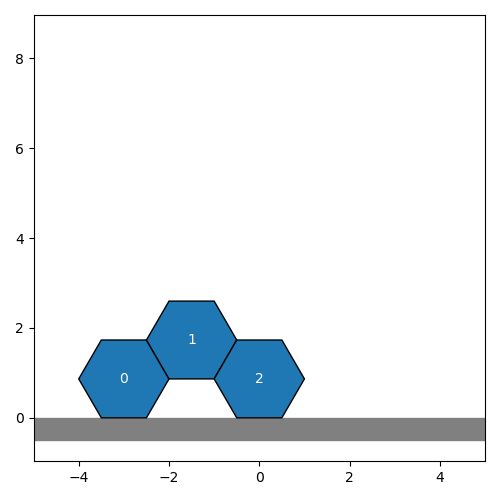
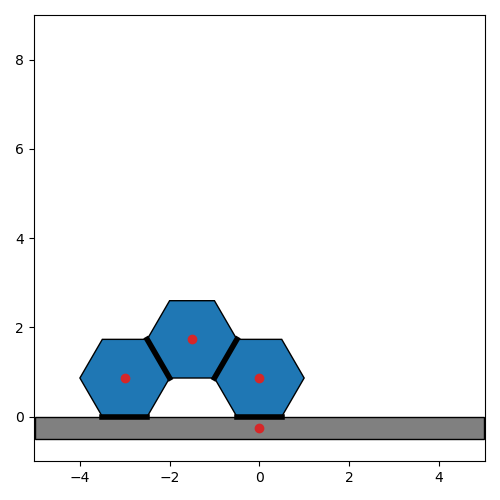
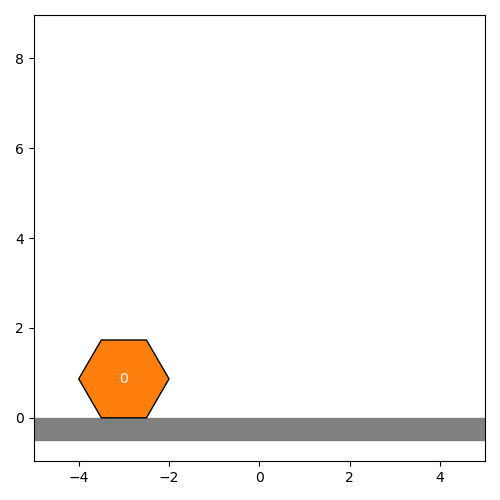
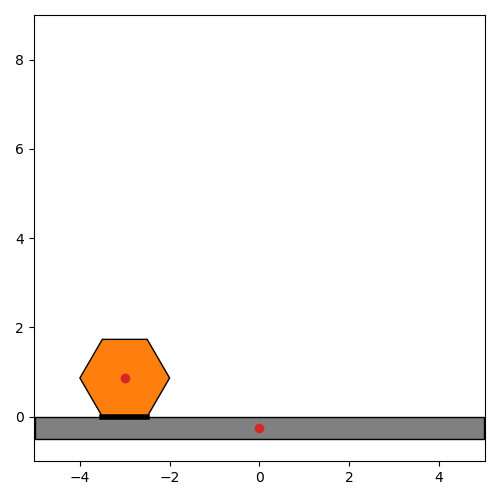
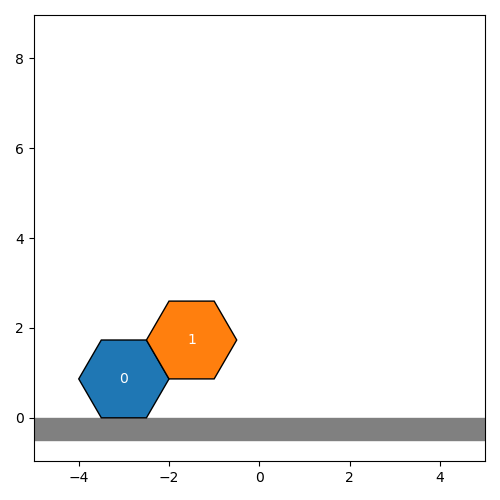
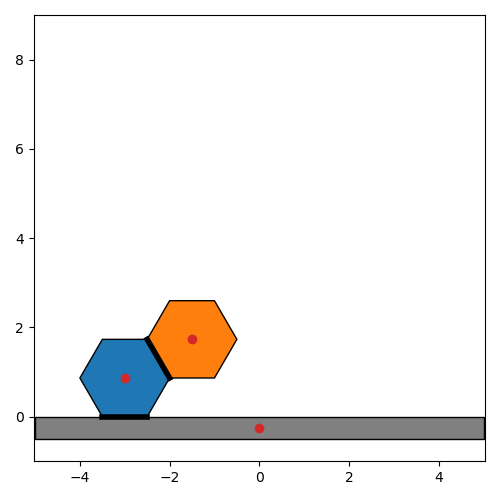
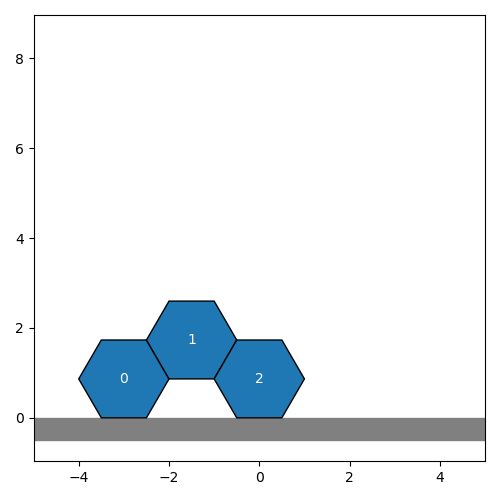
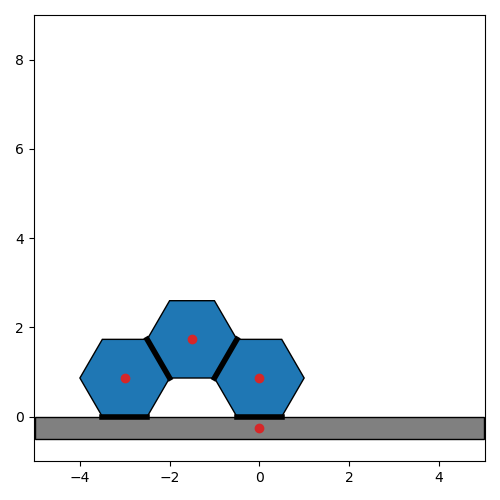
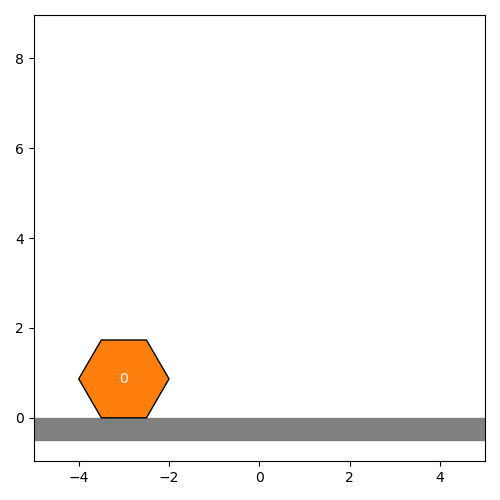
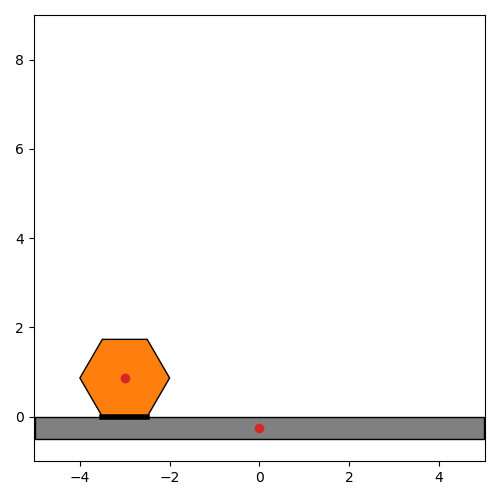
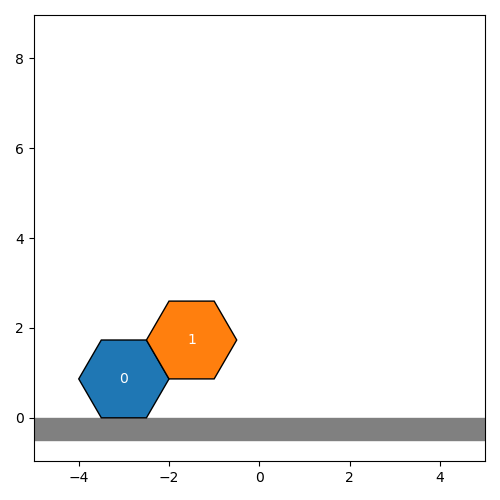
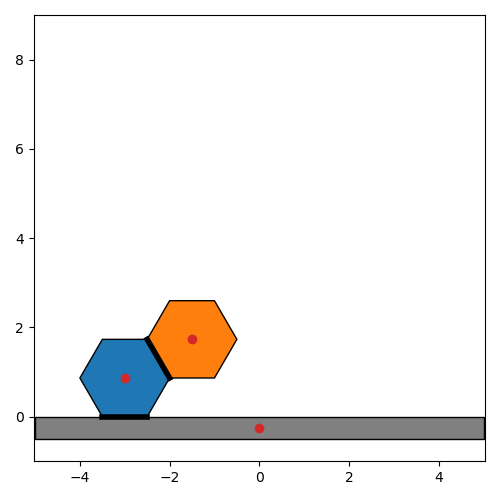
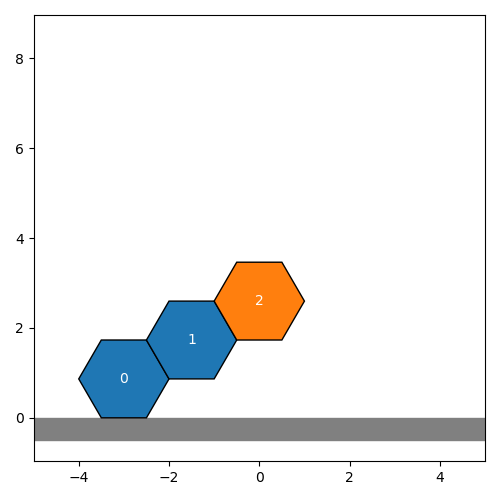
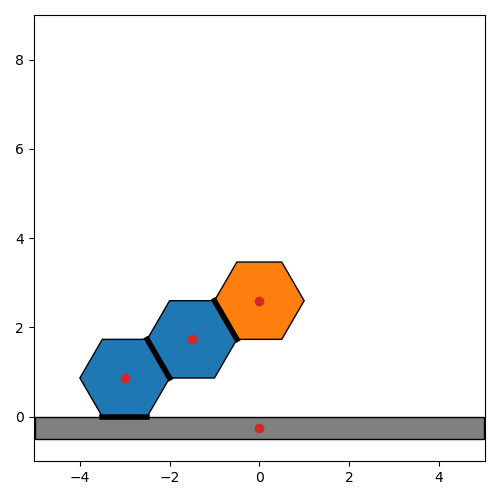
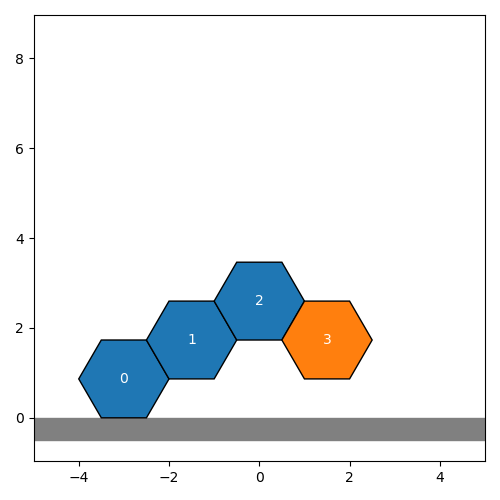
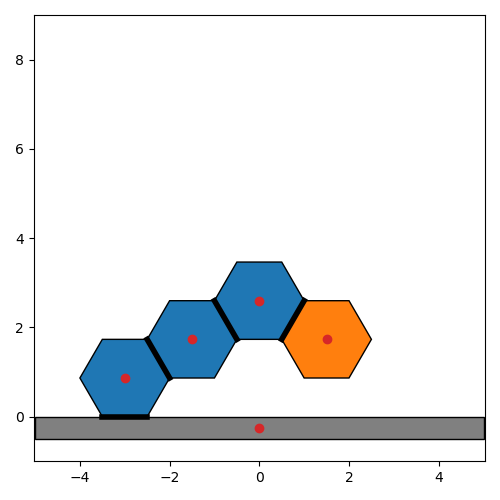
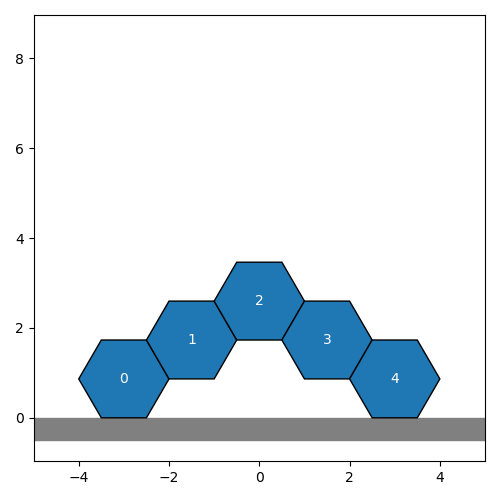
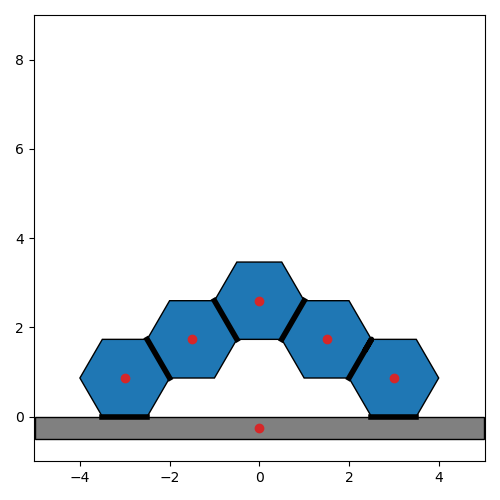
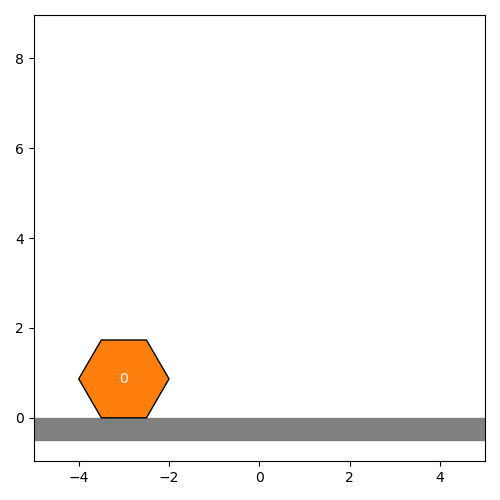
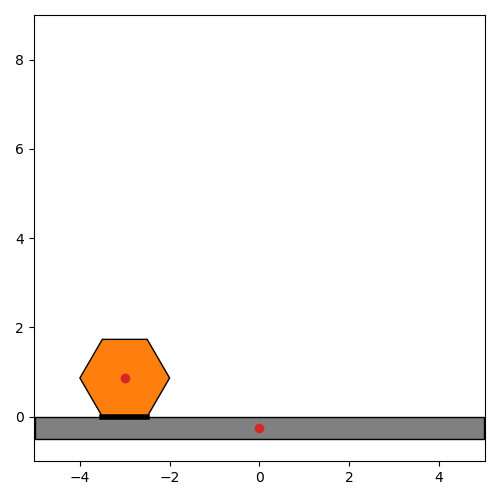
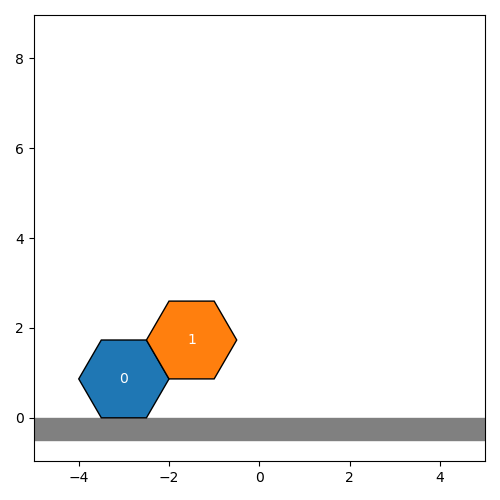
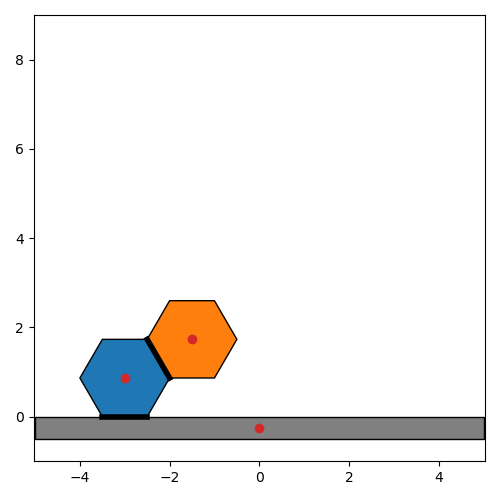
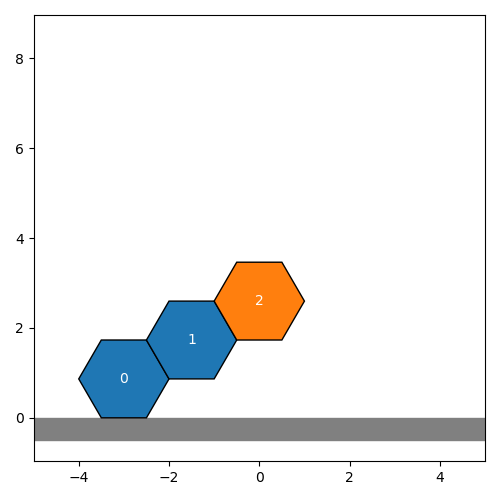
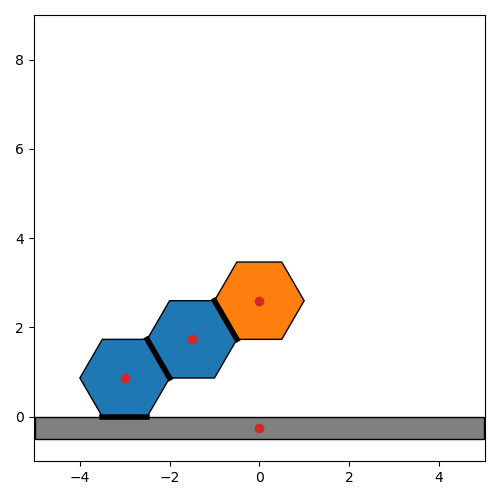
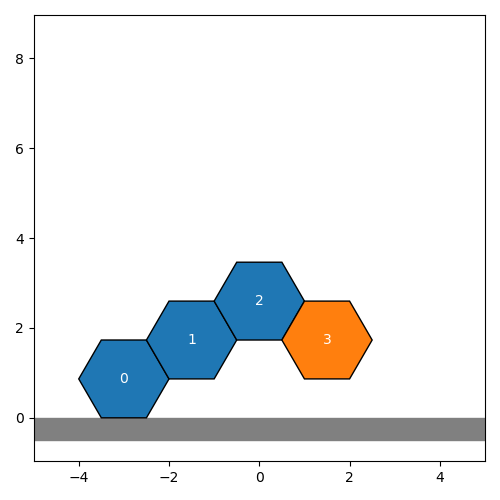
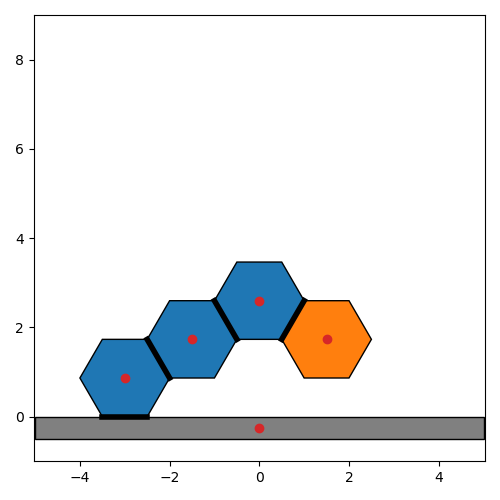
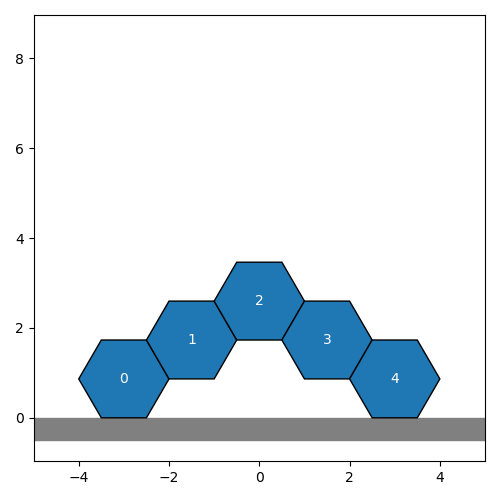
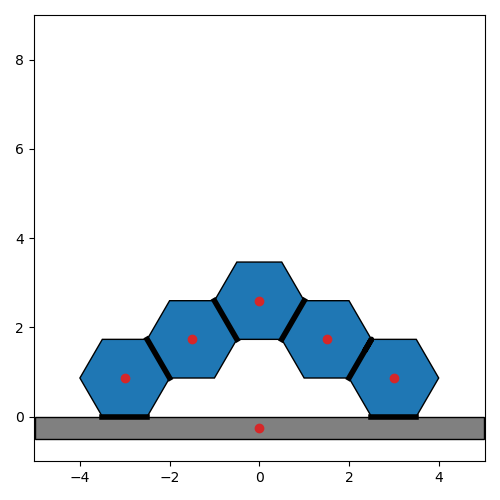
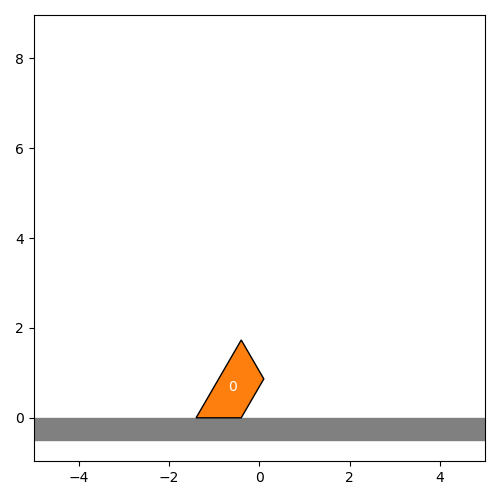
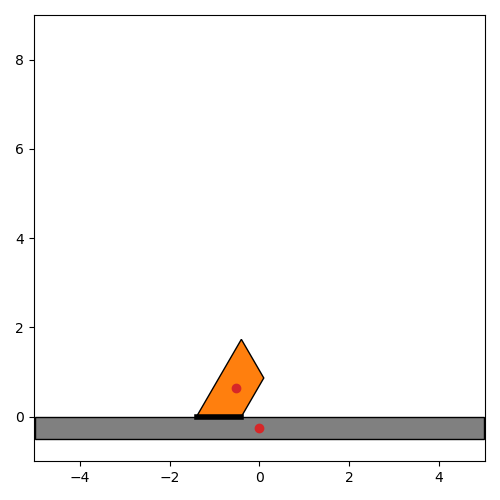
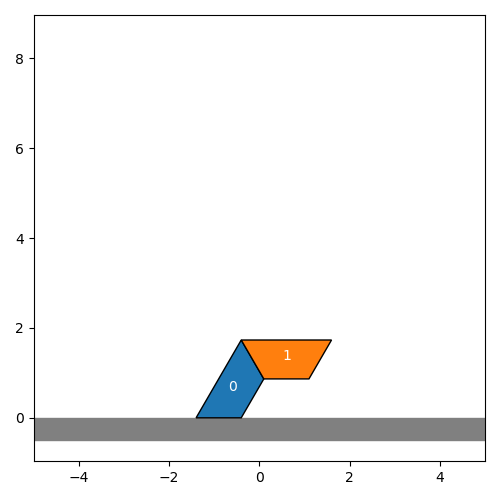
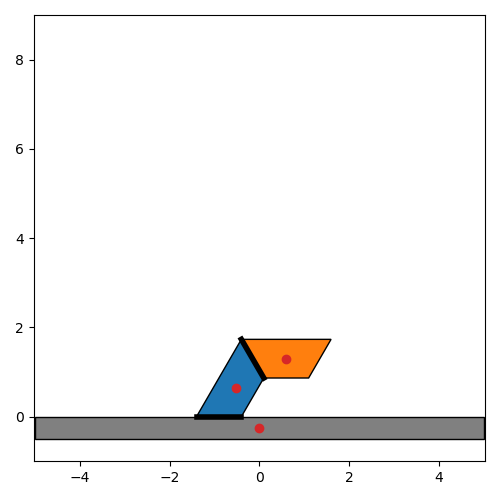
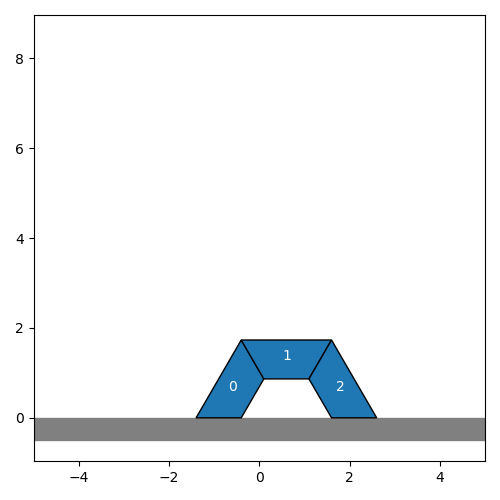
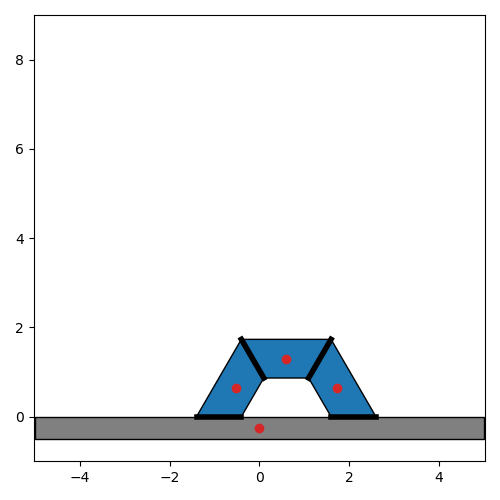
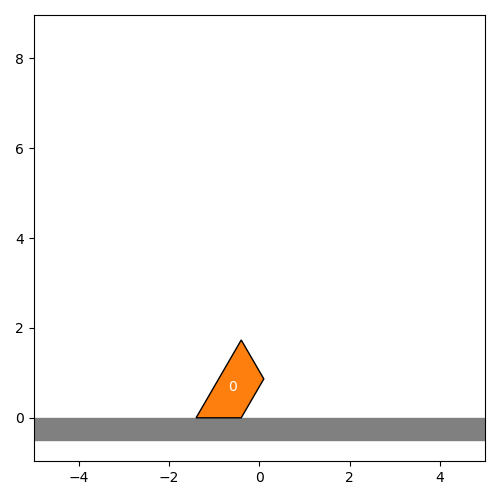
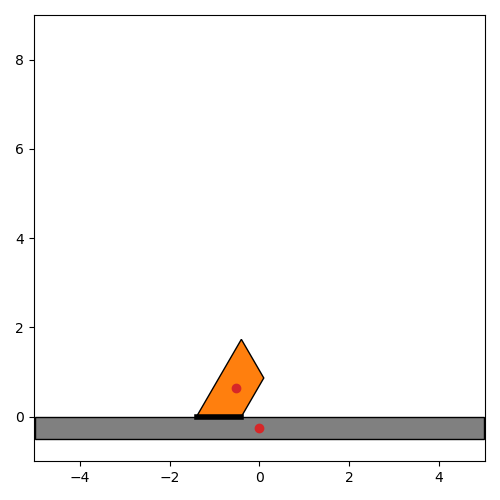
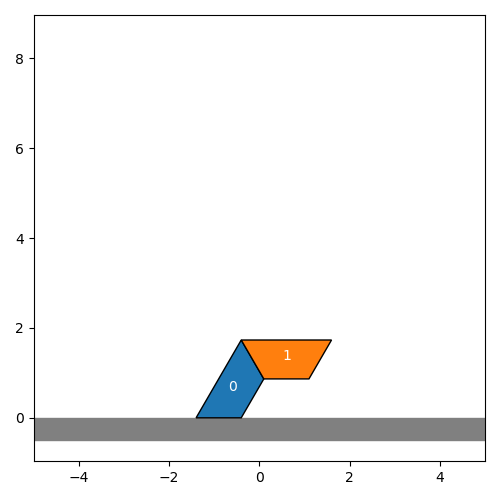
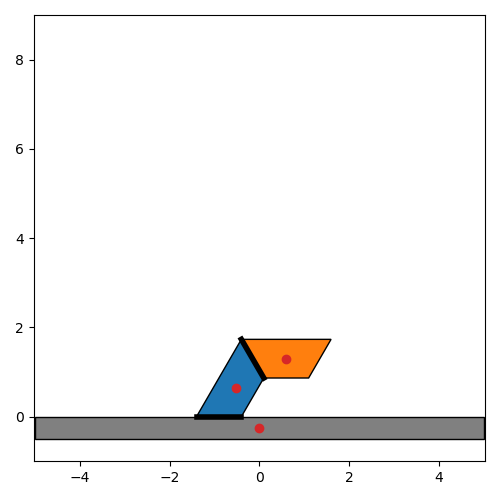
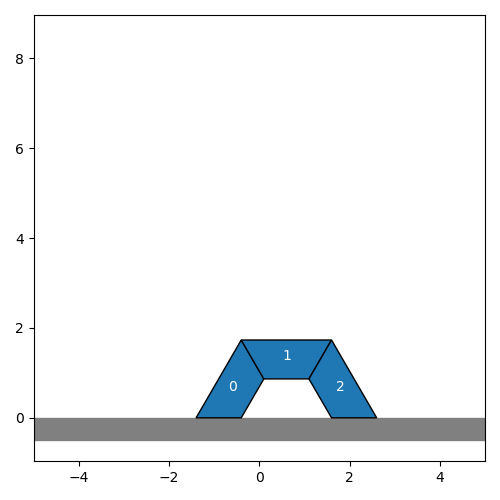
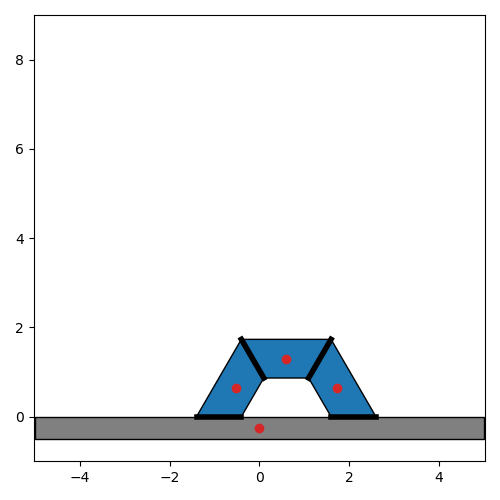
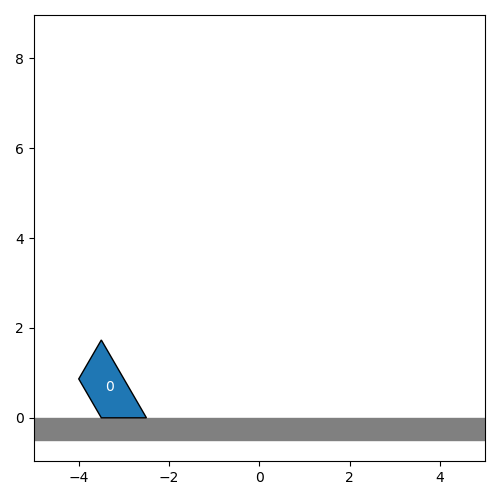
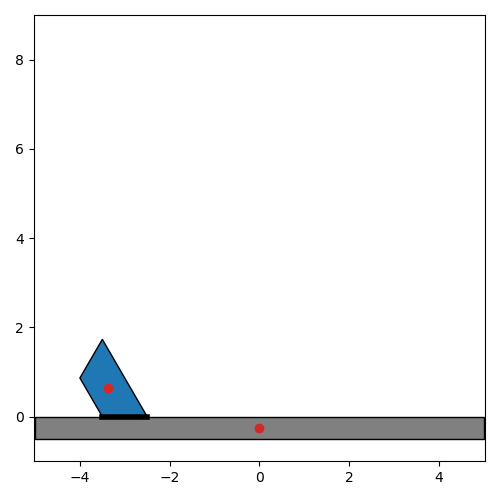
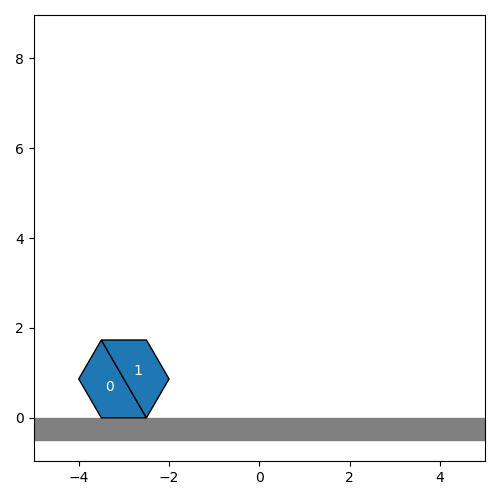
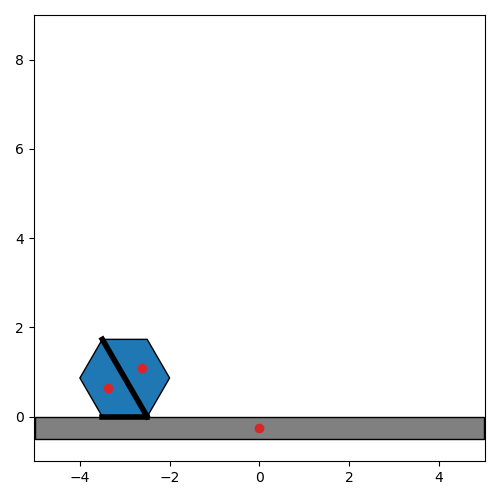
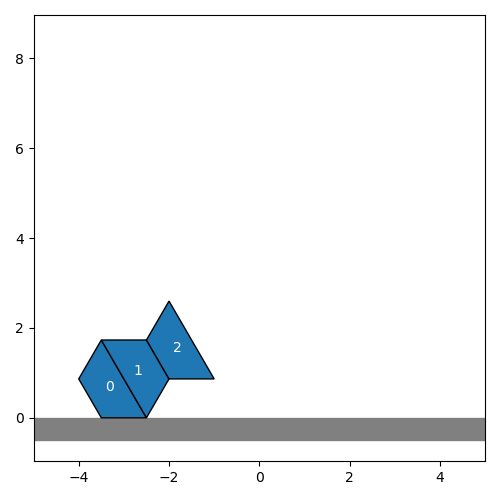
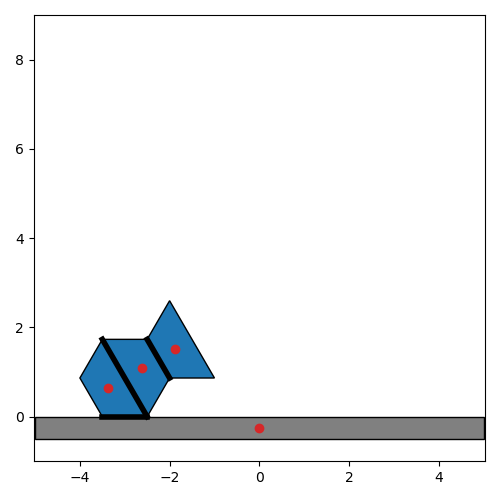
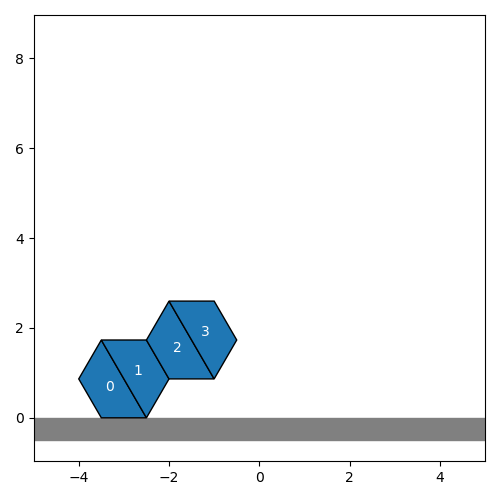
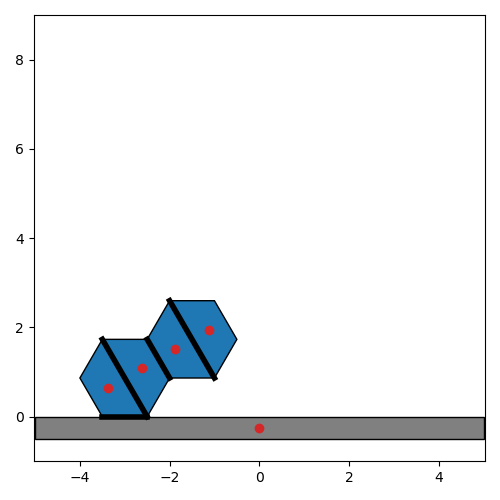
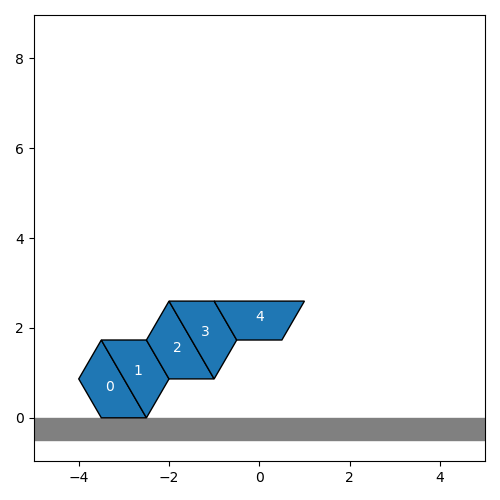
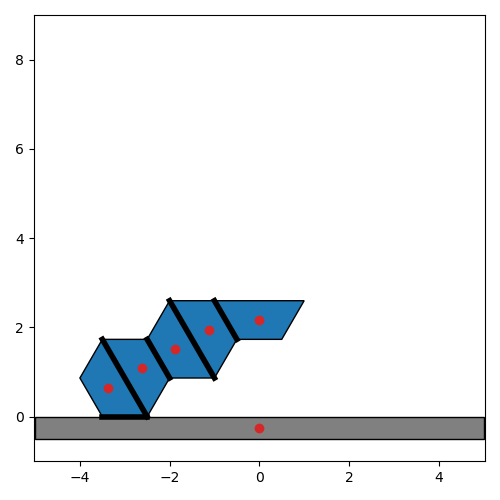
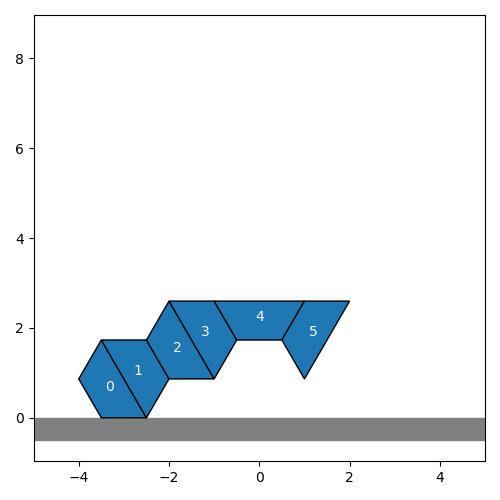
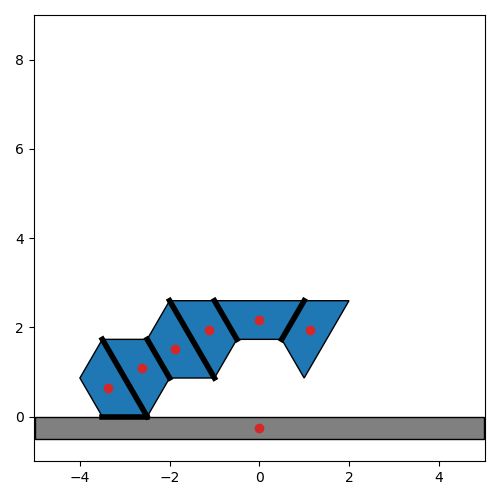
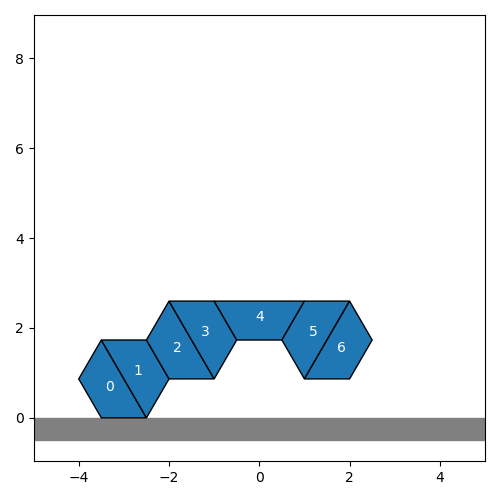
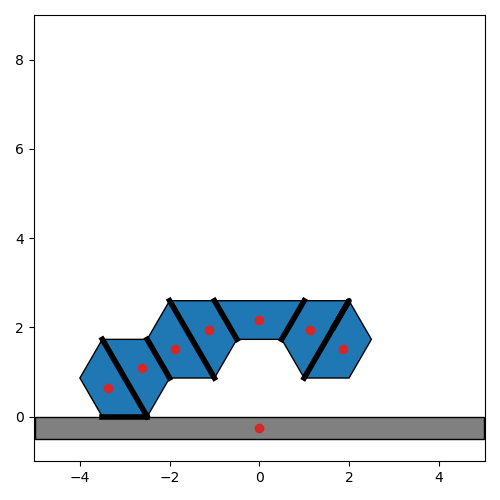
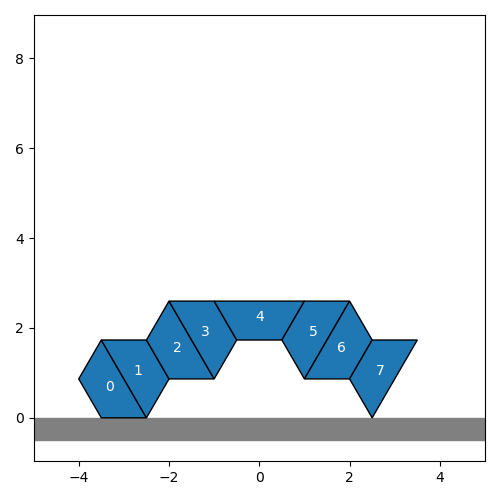
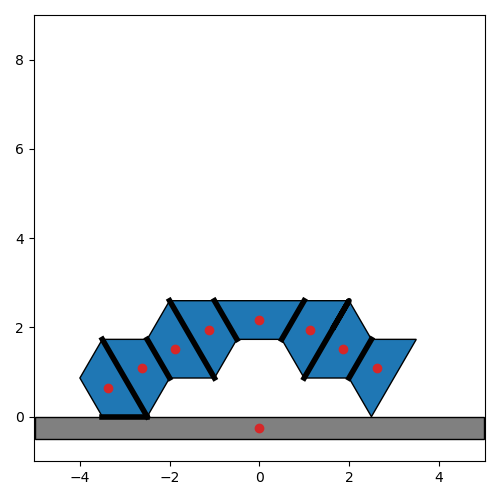
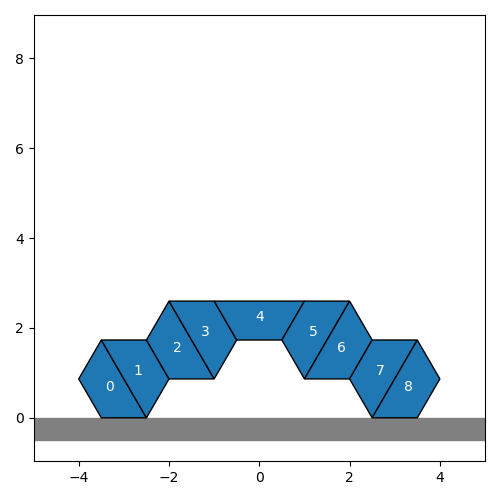
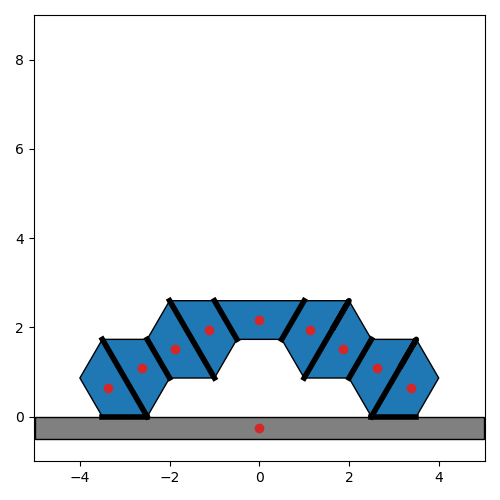
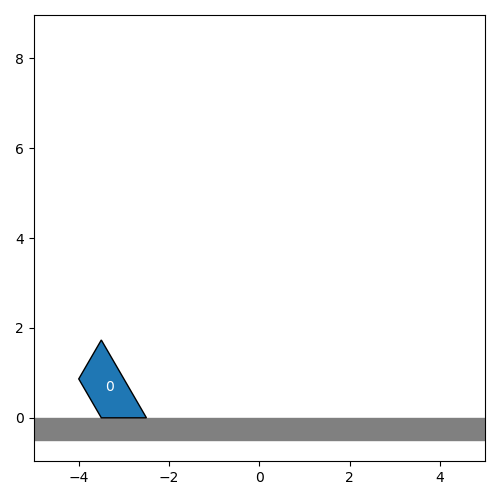
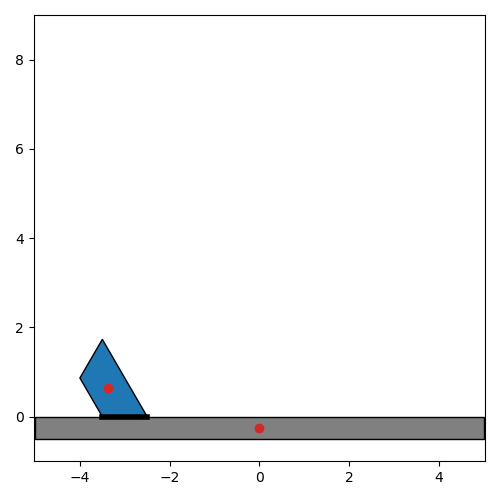
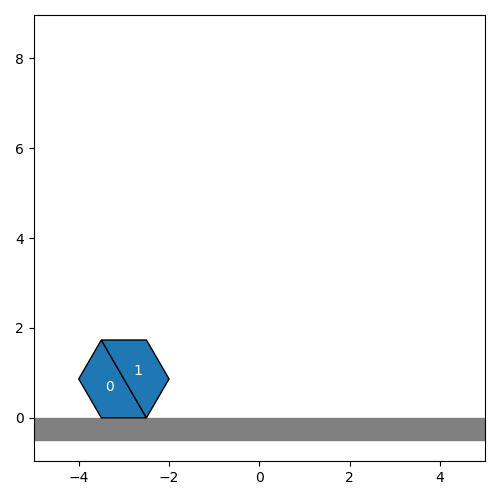
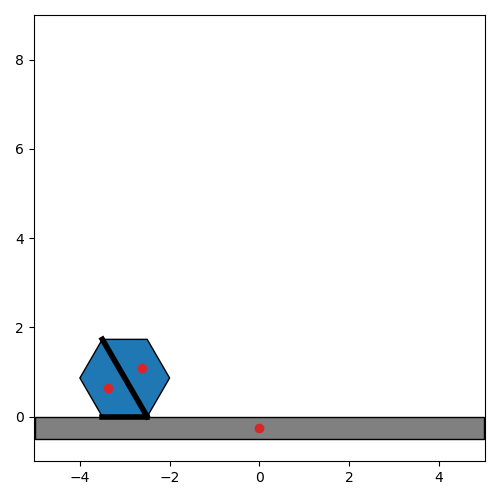
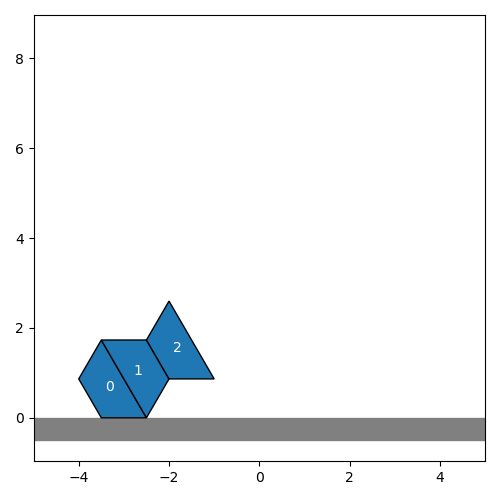
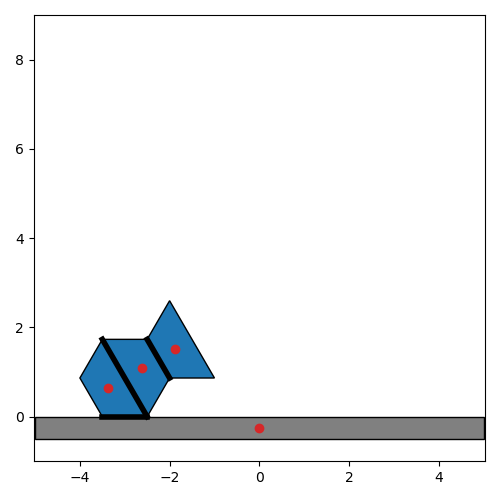
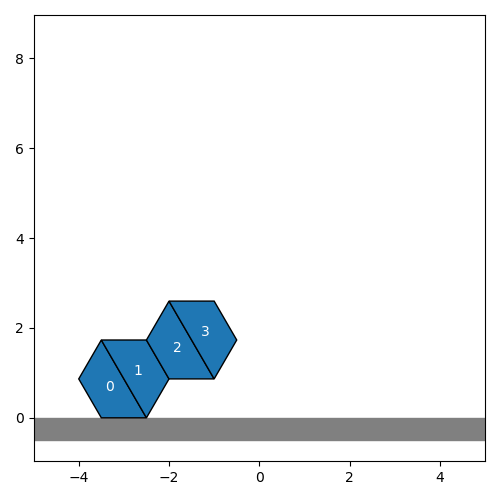
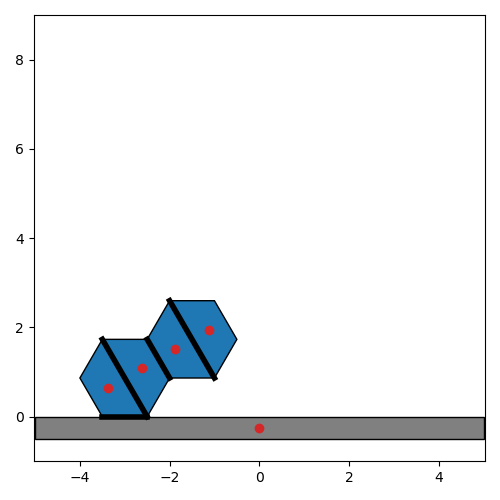
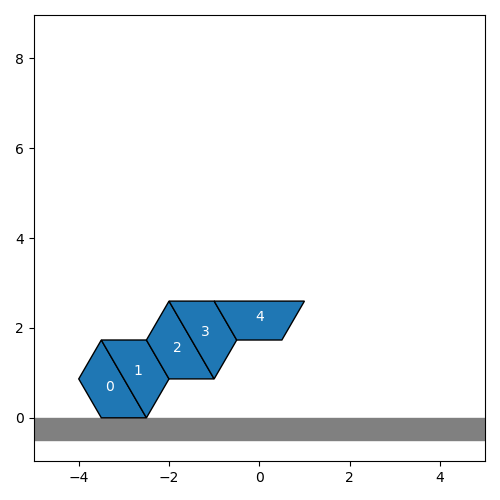
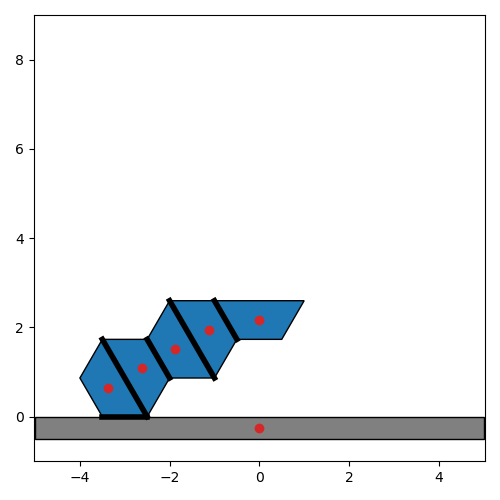
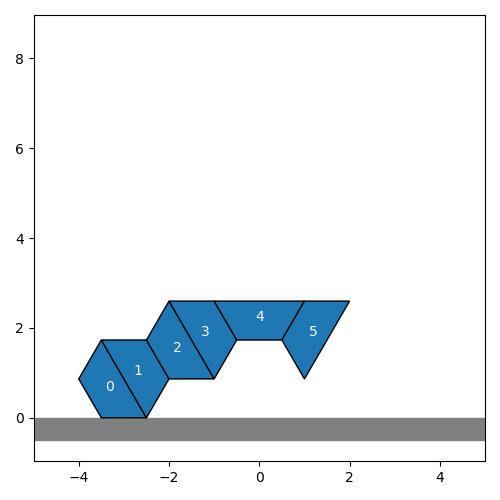
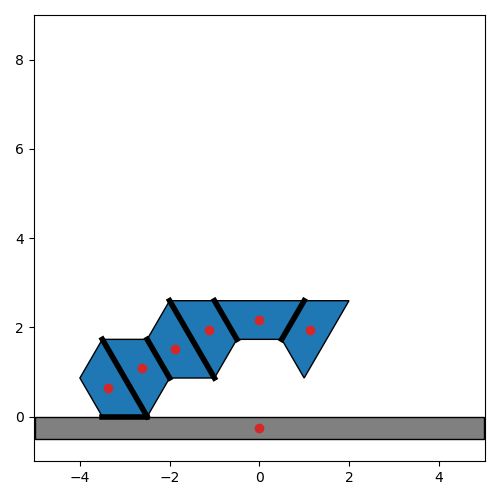
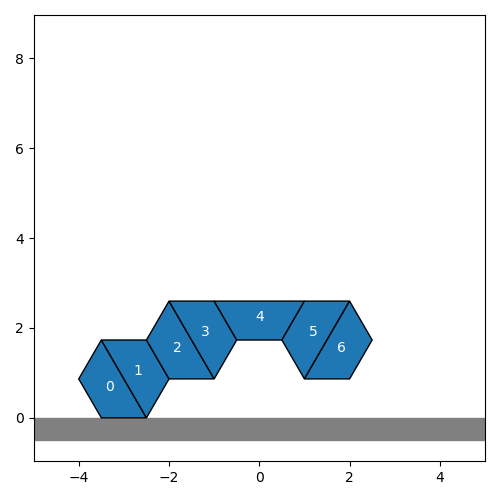
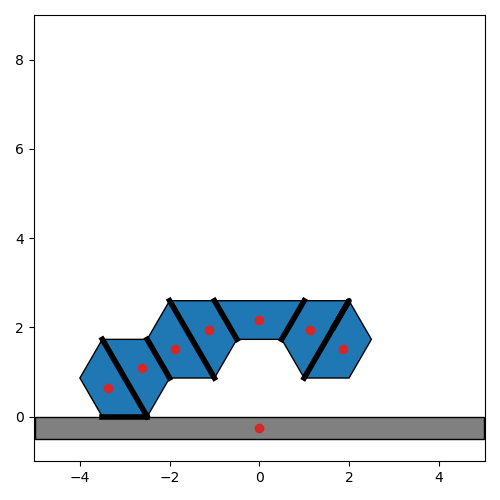
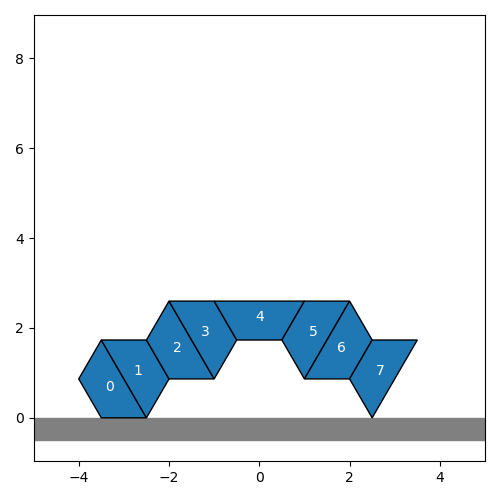
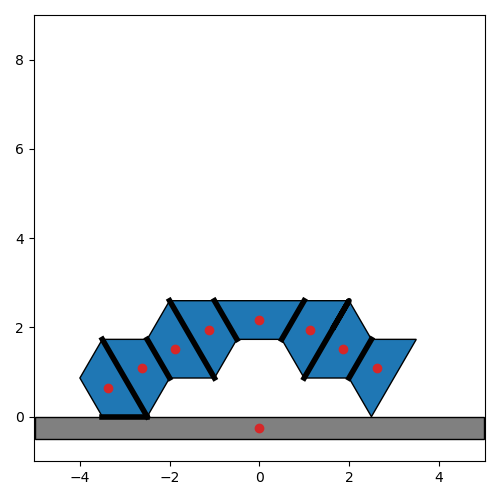
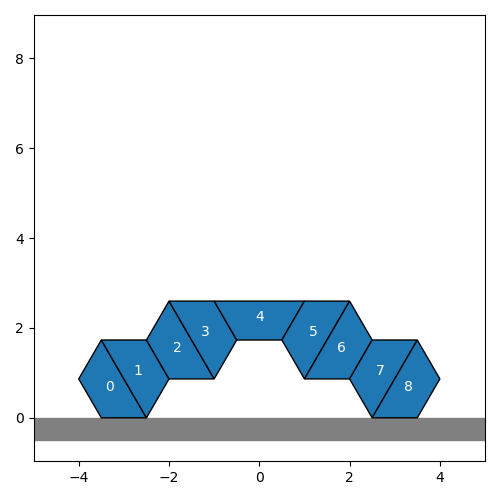
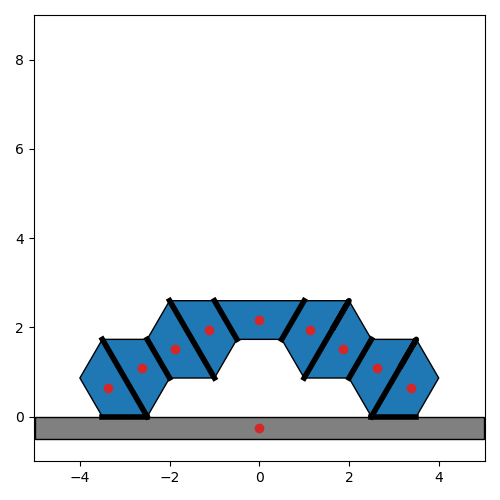
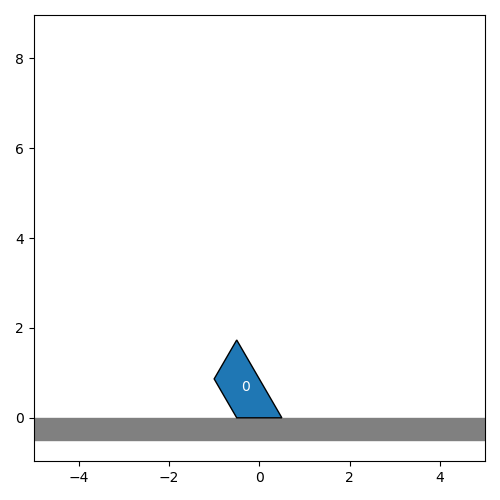
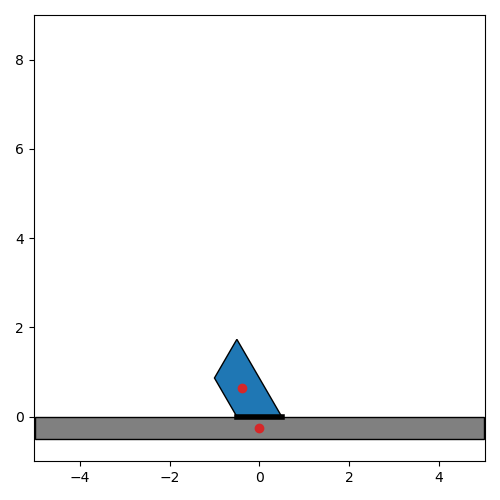
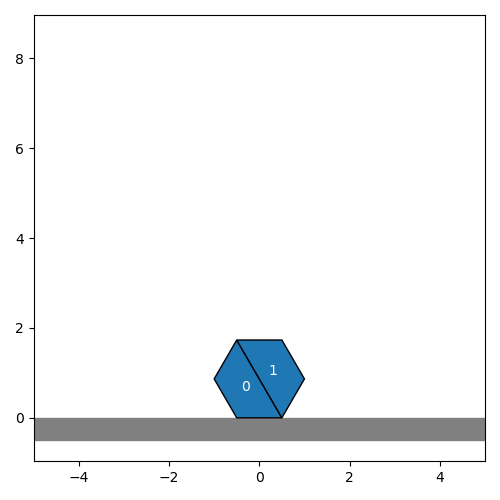
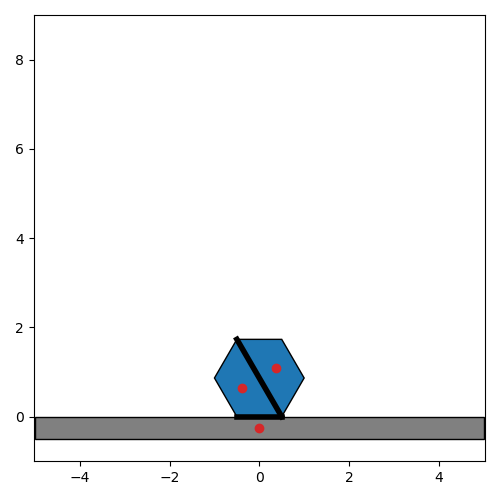
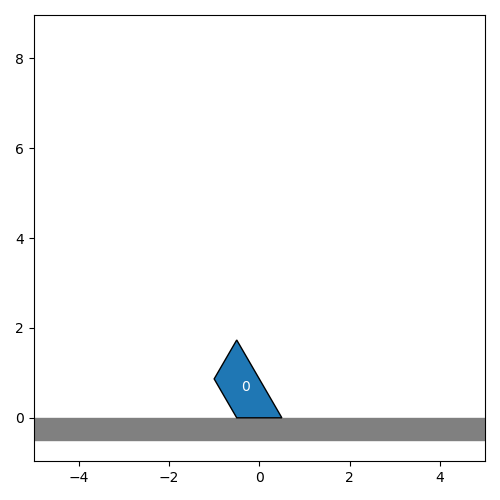
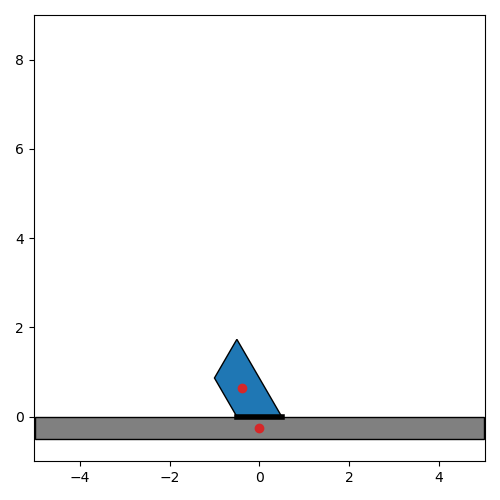
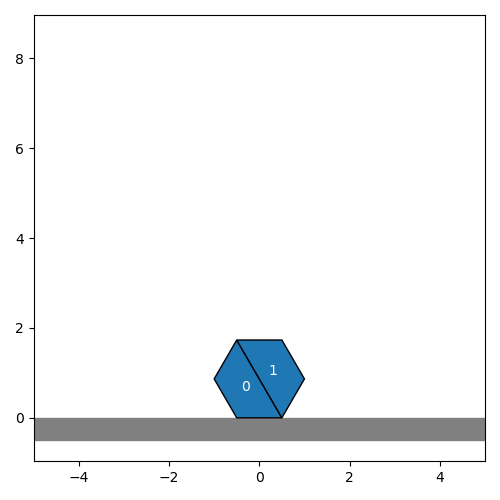
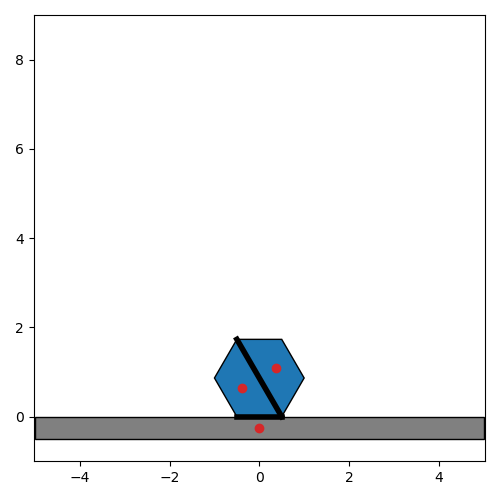
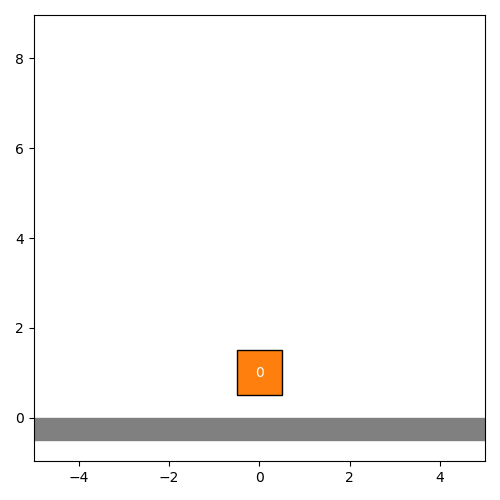
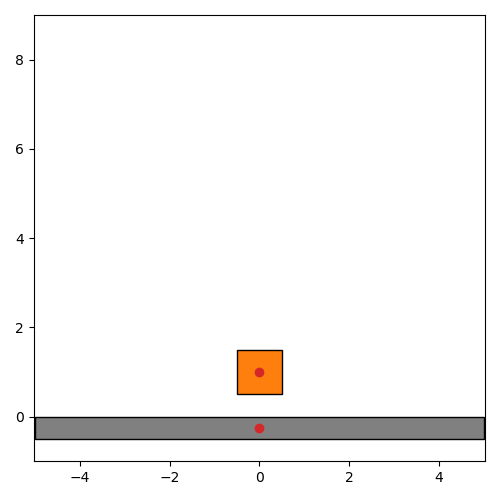
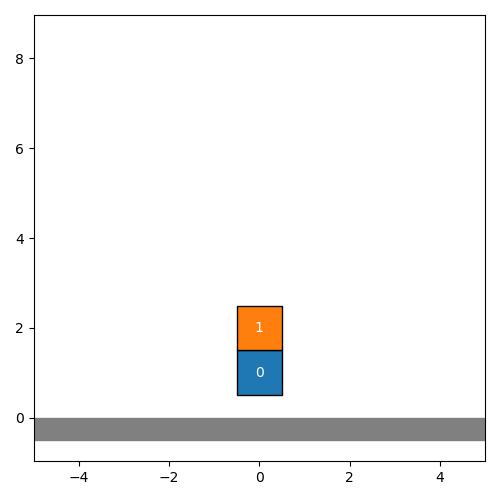
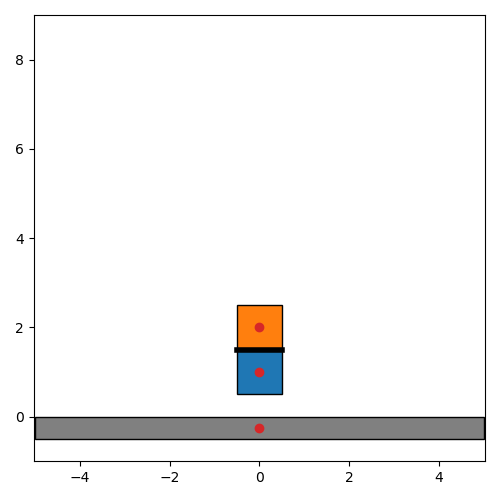
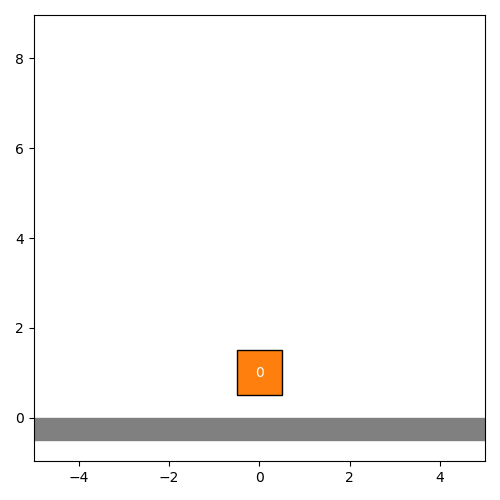
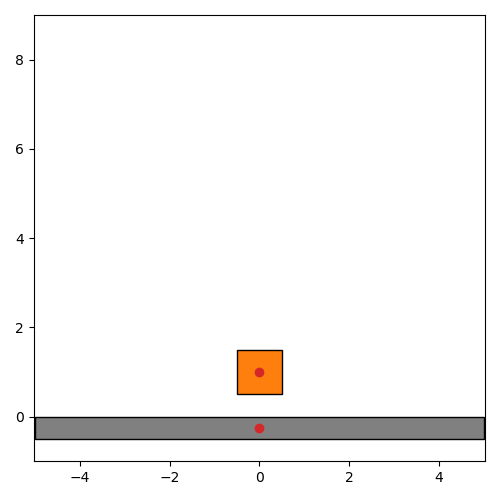
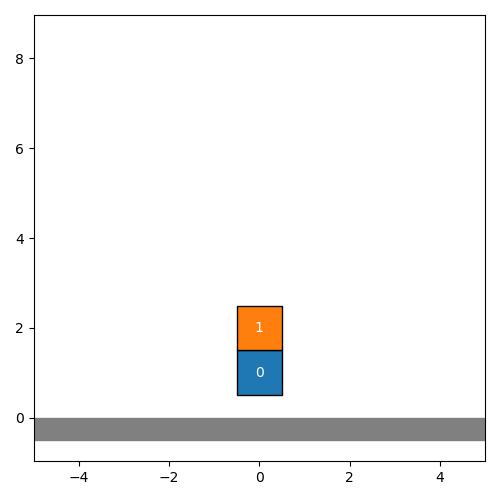
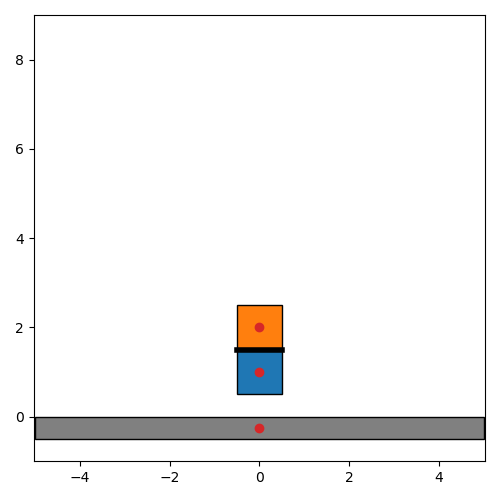

In [3]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="200" >'


# Function to convert image to base64
def image_to_base64(path):
    with open(path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return f'<img src="data:image/png;base64,{encoded_string}"  style="width:200px;" >'

# Convert DataFrame to HTML and replace image paths with actual images
df['plot_env_img'] = df['plot_env'].apply(lambda x: image_to_base64(x))
df['plot_cra_img'] = df['plot_cra'].apply(lambda x: image_to_base64(x))
# df.drop('Image Path', axis=1, inplace=True)

df_display = df.drop(['plot_cra', 'plot_env'], axis=1)


# df_display = df_display[df_display['mu'] == 2.0]

# Function to apply conditional formatting to HTML
def style_bool(val):
    color = '#66CC99' if val else '#FF9999'
    return f'background-color: {color}; color: white'


# Display the DataFrame as HTML
html = df_display.to_html(escape=False)


for val in [True, False]:
    style = style_bool(val)
    html = html.replace(f'<td>{val}</td>', f'<td style="{style}">{val}</td>')


# # Convert DataFrame to HTML and apply styles
# def df_to_html_with_styles(df):
#     html = df.to_html(escape=False)
#     for column in ['Ground Truth', 'Prediction 1', 'Prediction 2']:
#         for val in [True, False]:
#             style = style_bool(val)
#             html = html.replace(f'<td>{val}</td>', f'<td style="{style}">{val}</td>')
#     return html

# Generate the styled HTML
# html_table = df_to_html_with_styles(df)

# Define the CSS to ensure the table is nicely formatted
html_style = """
<style>
    body {
        font-family: Arial, sans-serif;
    }
    table {
        border-collapse: collapse;
        margin: 20px 0;
        font-size: 18px;
        text-align: center;
    }
    th, td {
        border: 1px solid black;
        padding: 10px;
    }
    th {
        background-color: #f2f2f2;
    }
</style>
"""

# Combine the CSS and the HTML table
html = f"<!DOCTYPE html><html><head>{html_style}</head><body>{html}</body></html>"


# Display the DataFrame as HTML
display(HTML(html))

# save html
with open('test.html', 'w') as f:
    f.write(html)

# Structures Overview

In [1]:
from assembly_gym.utils.structures import tower, hexagon, trapezoid_bridge, hexagon_bridge_3, hexagon_bridge_5, levitating_block, horizontal_bridge
from assembly_gym.utils.rendering import plot_assembly_env, plot_cra_assembly
import matplotlib.pyplot as plt

def plot_structure(env, actions):
    fig, axes = plt.subplots(2, len(actions), figsize=(len(actions)*3, 6), squeeze=False)
    for (ax1, ax2), (action, is_stable) in zip(axes.T, actions):
        env.step(action)
        plot_assembly_env(env, fig=fig, ax=ax1)
        ax1.set_title("stable" if is_stable else "unstable") 
        plot_cra_assembly(env.assembly_env, fig=fig, ax=ax2, plot_forces=False)
    
    fig.suptitle(f'mu={env.assembly_env.mu}, density={env.assembly_env.density}', size=10)
    fig.subplots_adjust()
    fig.tight_layout()

pybullet build time: Nov 28 2023 23:45:17


argv[0]=


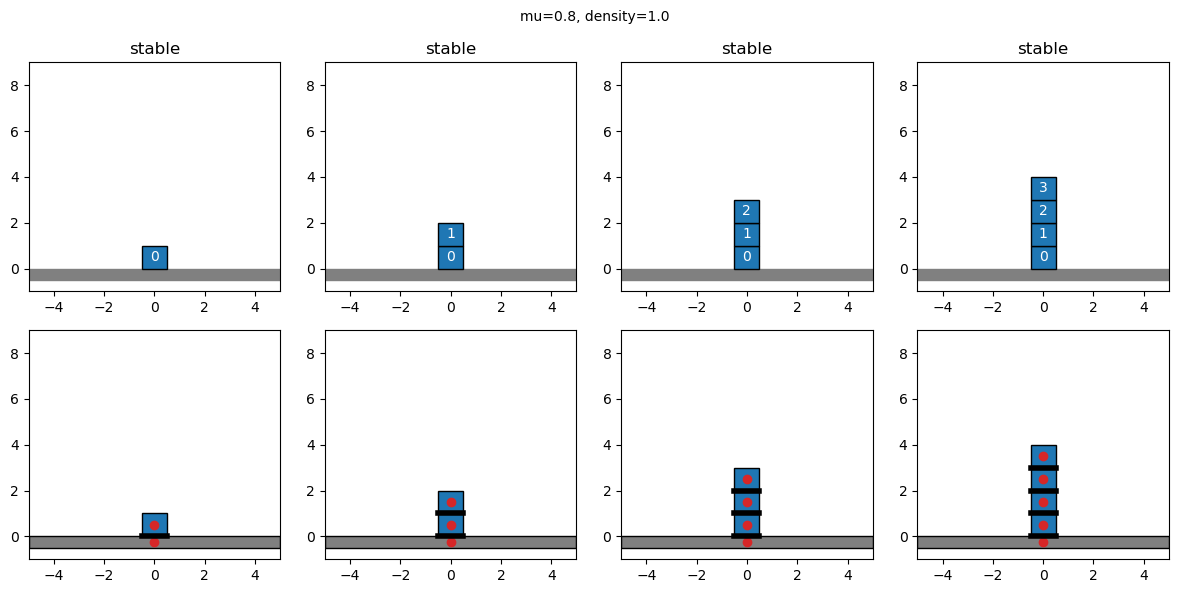

In [2]:
plot_structure(*tower(mu=0.8, density=1., num_blocks=4))

argv[0]=


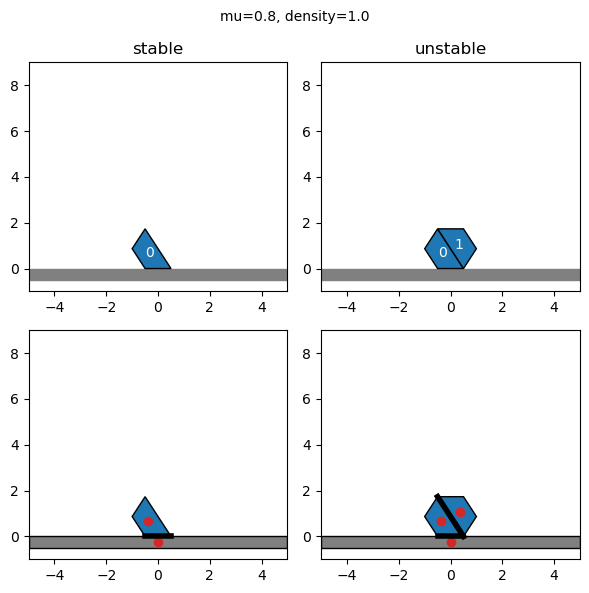

In [3]:
plot_structure(*hexagon(mu=0.8, density=1.0))

argv[0]=


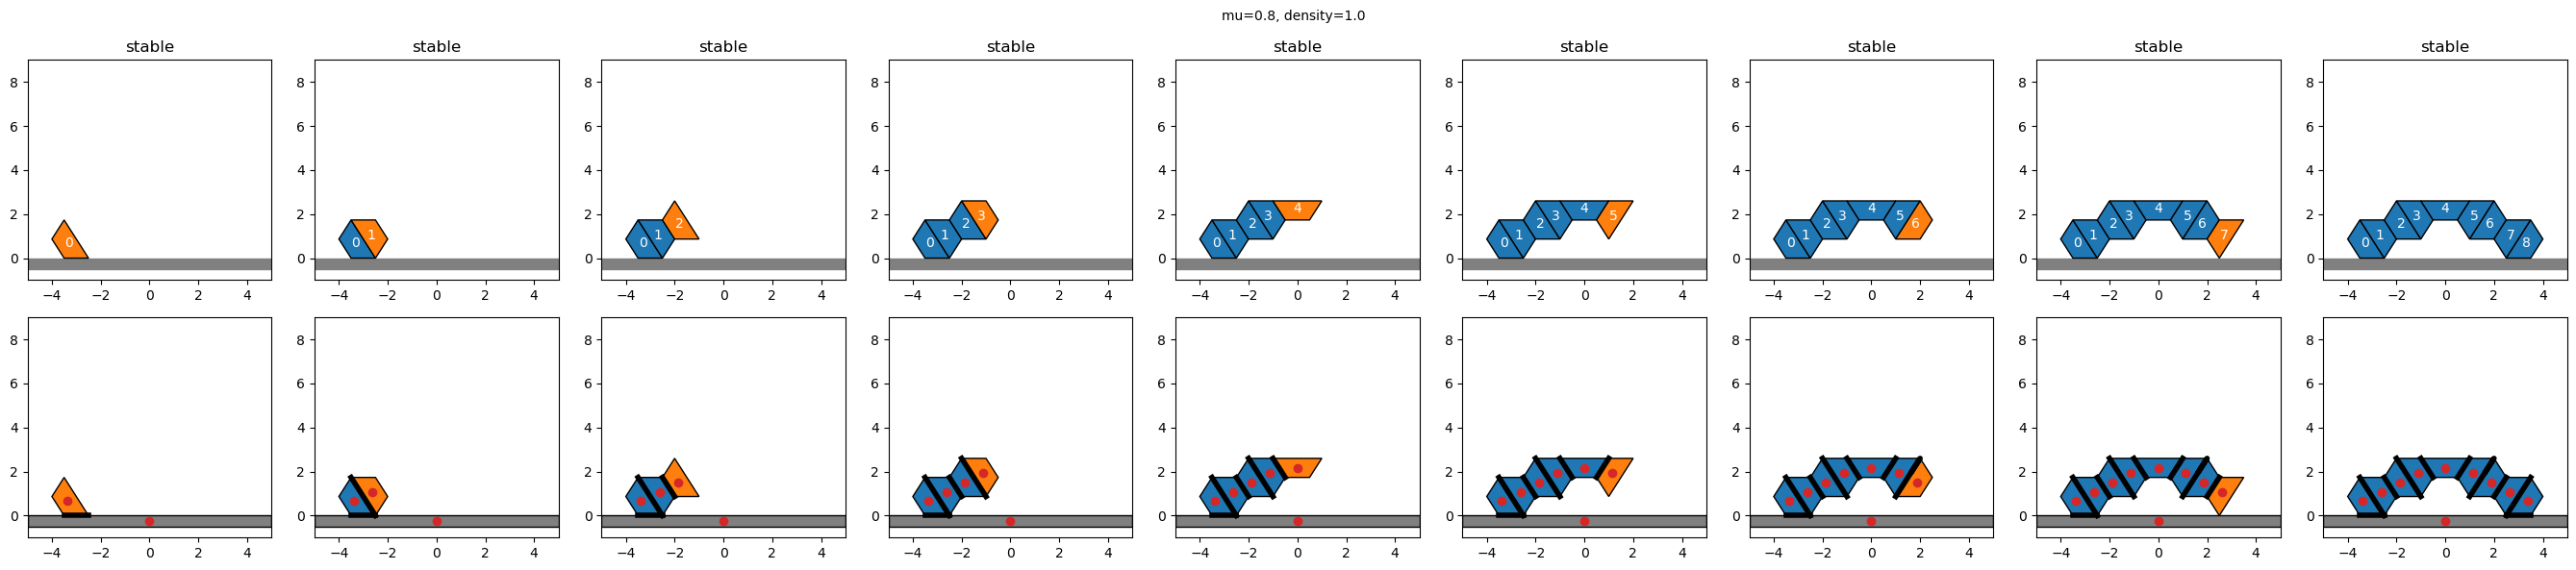

In [4]:
plot_structure(*trapezoid_bridge(mu=0.8, density=1.0, freeze_last=True))

argv[0]=
argv[0]=


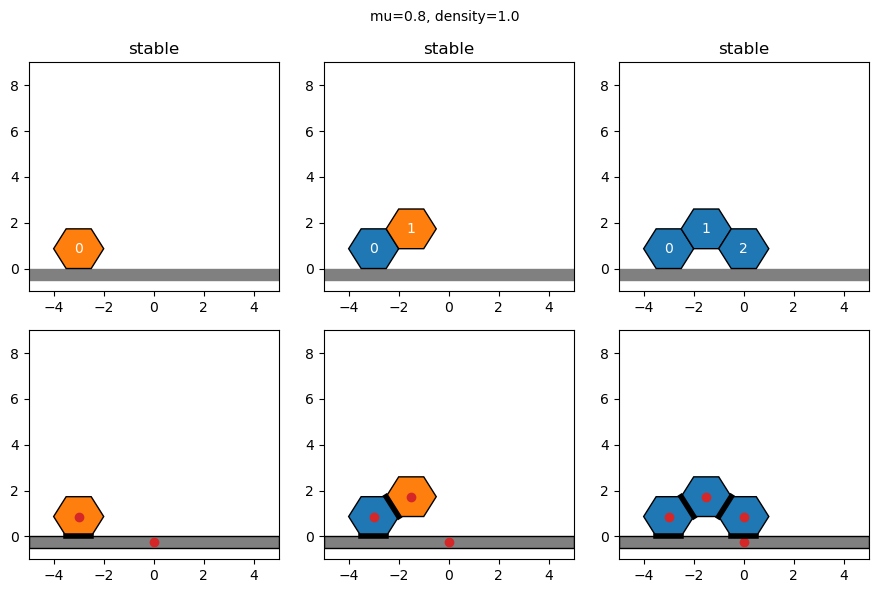

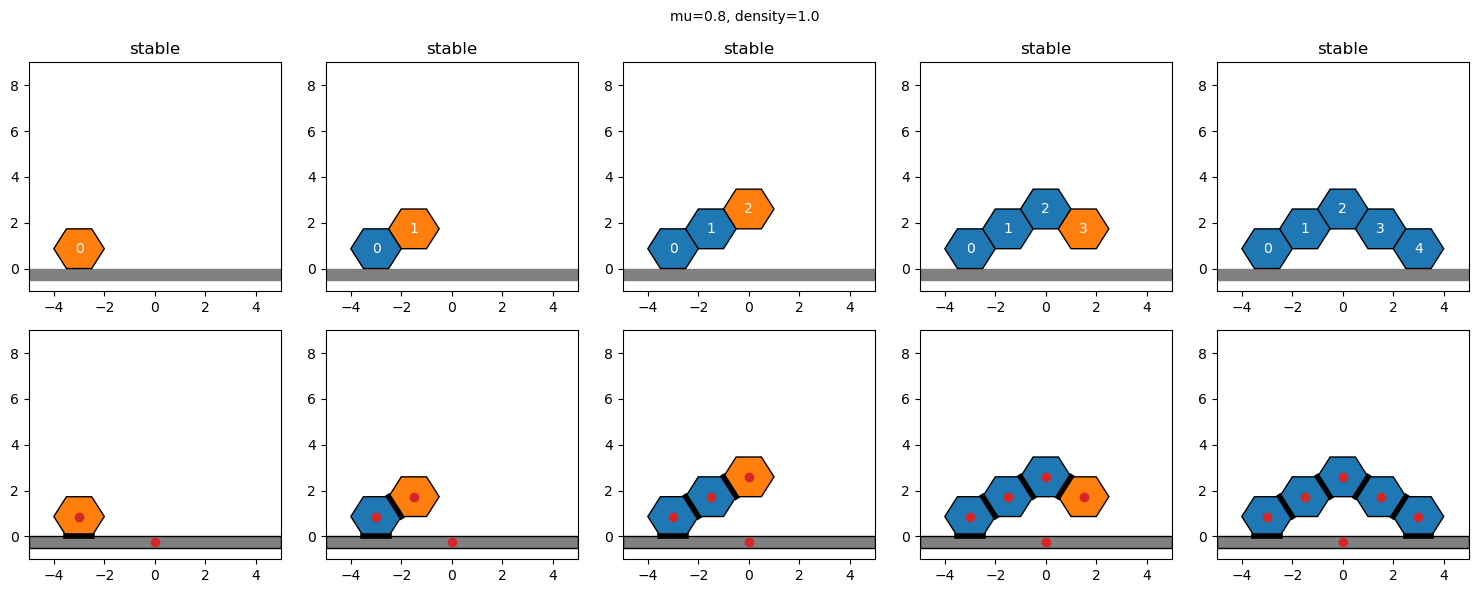

In [5]:
plot_structure(*hexagon_bridge_3(mu=0.8, density=1.0, freeze_last=True))
plot_structure(*hexagon_bridge_5(mu=0.8, density=1.0, freeze_last=True))


argv[0]=


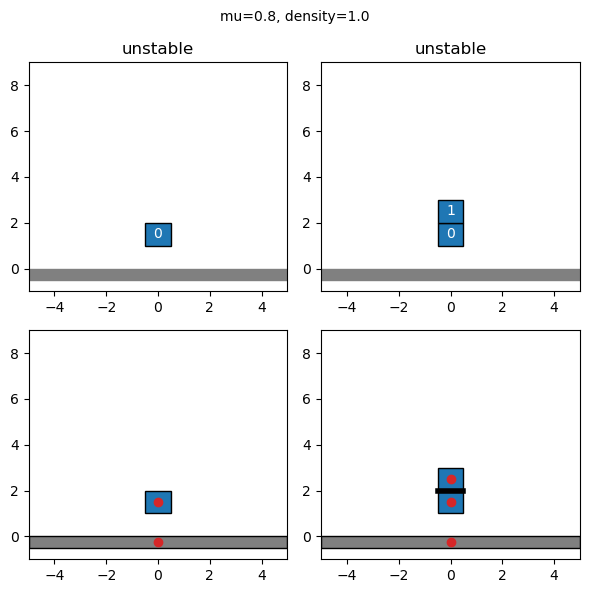

In [6]:
plot_structure(*levitating_block(mu=0.8, density=1.0, freeze_last=False, offset_y=1.))

argv[0]=


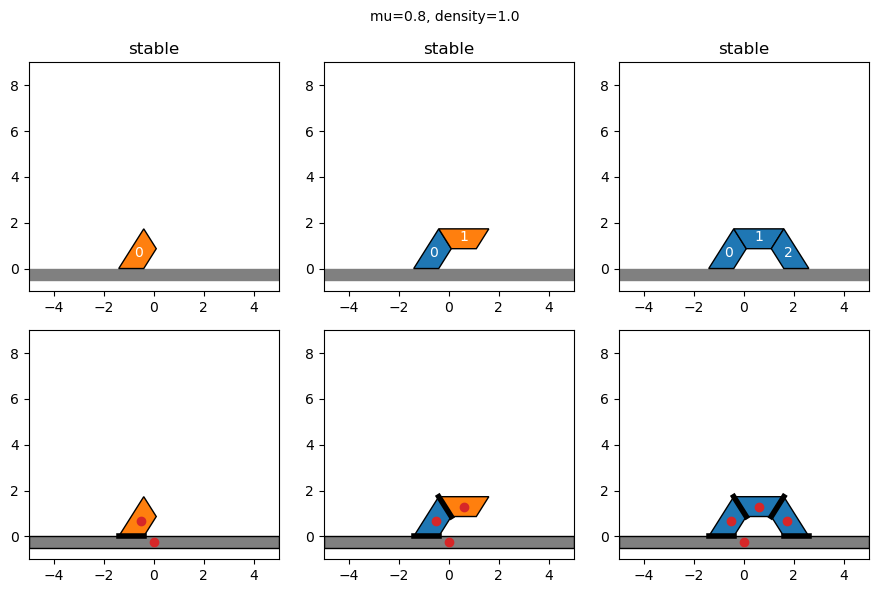

In [7]:
plot_structure(*horizontal_bridge(mu=0.8, density=1.0, freeze_last=True))